<a href="https://colab.research.google.com/github/CelinBiju/BigData/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=cb02fd5b23edd59b622d258bf0fb23121dcd73e03e0c7223bc2091edc484a338
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Now you can use SparkSession to work with Spark


In [7]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you've uploaded a file named 'heart.csv'
# Use the correct filename if it's different
file_path = 'heart.csv'

# Read the CSV file into a DataFrame using PySpark
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Now you can work with your DataFrame 'df'
# For example, you can show the first few rows:
df.show(5)

# Don't forget to stop the SparkSession
spark.stop()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
+---+---+-------------+---------+-----------+---------+-

In [8]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Load the CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Count the number of rows
num_rows = data.count()

# Count the number of columns
num_cols = len(data.columns)

# Print the shape
print("Shape of the DataFrame: ({}, {})".format(num_rows, num_cols))


Shape of the DataFrame: (918, 12)


In [9]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Load the CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# List out the column names
column_names = data.columns

# Print the column names
print(column_names)

# Stop the SparkSession
spark.stop()


['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [10]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Show information about the DataFrame
data.printSchema()  # prints the schema of the DataFrame
data.show()        # shows the content of the DataFrame

root
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|     

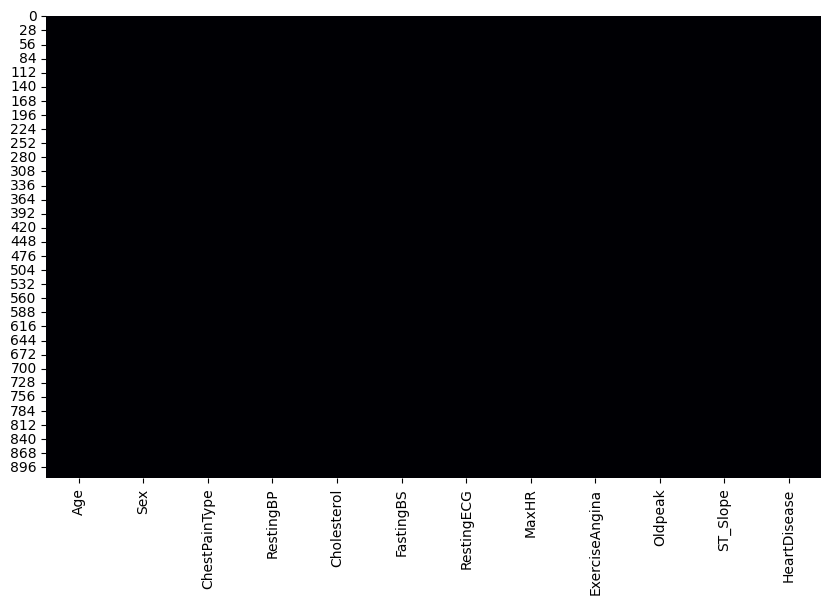

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = data.toPandas()

# Plot heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pandas_df.isnull(), cmap='magma', cbar=False)
plt.show()

In [12]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Compute summary statistics
summary = data.describe()

# Transpose the result
summary = summary.toPandas().transpose()

# Show the transposed summary statistics
print(summary)


                    0                    1                    2     3    4
summary         count                 mean               stddev   min  max
Age               918   53.510893246187365     9.43261650673202    28   77
Sex               918                 None                 None     F    M
ChestPainType     918                 None                 None   ASY   TA
RestingBP         918   132.39651416122004   18.514154119907808     0  200
Cholesterol       918    198.7995642701525   109.38414455220345     0  603
FastingBS         918  0.23311546840958605  0.42304562473930296     0    1
RestingECG        918                 None                 None   LVH   ST
MaxHR             918   136.80936819172112    25.46033413825029    60  202
ExerciseAngina    918                 None                 None     N    Y
Oldpeak           918   0.8873638344226581   1.0665701510493264  -2.6  6.2
ST_Slope          918                 None                 None  Down   Up
HeartDisease      918   0

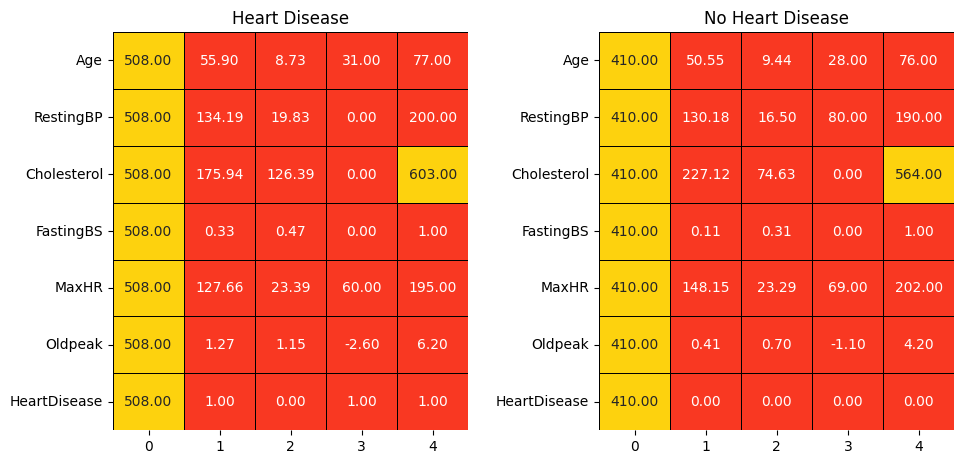

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd  # Adding the import statement for pandas
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Filter data for HeartDisease == 1 and compute summary statistics
yes = data.filter(col("HeartDisease") == 1).describe().toPandas().transpose()

# Filter data for HeartDisease == 0 and compute summary statistics
no = data.filter(col("HeartDisease") == 0).describe().toPandas().transpose()

# Define colors for the heatmap
colors = ['#F93822', '#FDD20E']

# Remove non-numeric rows
yes_numeric = yes.apply(pd.to_numeric, errors='coerce').dropna()
no_numeric = no.apply(pd.to_numeric, errors='coerce').dropna()

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot heatmap for Heart Disease == 1
plt.subplot(1, 2, 1)
sns.heatmap(yes_numeric, annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')

# Plot heatmap for No Heart Disease == 0
plt.subplot(1, 2, 2)
sns.heatmap(no_numeric, annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

# Adjust layout
fig.tight_layout(pad=2)

# Show plot
plt.show()

In [14]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Get column names
col = data.columns

# Initialize lists for categorical and numerical features
categorical_features = []
numerical_features = []

# Iterate over columns to determine categorical and numerical features
for i in col:
    unique_count = data.select(i).distinct().count()
    if unique_count > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

# Print categorical and numerical features
print('Categorical Features:', *categorical_features)
print('Numerical Features:', *numerical_features)


Categorical Features: Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features: Age RestingBP Cholesterol MaxHR Oldpeak


In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Create a copy of the DataFrame
df1 = data.select('*')

# Initialize StringIndexer for each categorical column
sex_indexer = StringIndexer(inputCol="Sex", outputCol="SexIndexed")
cp_indexer = StringIndexer(inputCol="ChestPainType", outputCol="ChestPainTypeIndexed")
ecg_indexer = StringIndexer(inputCol="RestingECG", outputCol="RestingECGIndexed")
angina_indexer = StringIndexer(inputCol="ExerciseAngina", outputCol="ExerciseAnginaIndexed")
slope_indexer = StringIndexer(inputCol="ST_Slope", outputCol="ST_SlopeIndexed")

# Fit and transform StringIndexer on the DataFrame
df1 = sex_indexer.fit(df1).transform(df1)
df1 = cp_indexer.fit(df1).transform(df1)
df1 = ecg_indexer.fit(df1).transform(df1)
df1 = angina_indexer.fit(df1).transform(df1)
df1 = slope_indexer.fit(df1).transform(df1)

# Show the DataFrame with indexed columns
df1.show()


+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+----------+--------------------+-----------------+---------------------+---------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|SexIndexed|ChestPainTypeIndexed|RestingECGIndexed|ExerciseAnginaIndexed|ST_SlopeIndexed|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+----------+--------------------+-----------------+---------------------+---------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|       0.0|                 2.0|              0.0|                  0.0|            1.0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|       1.0|                 1.0|              0.0|         

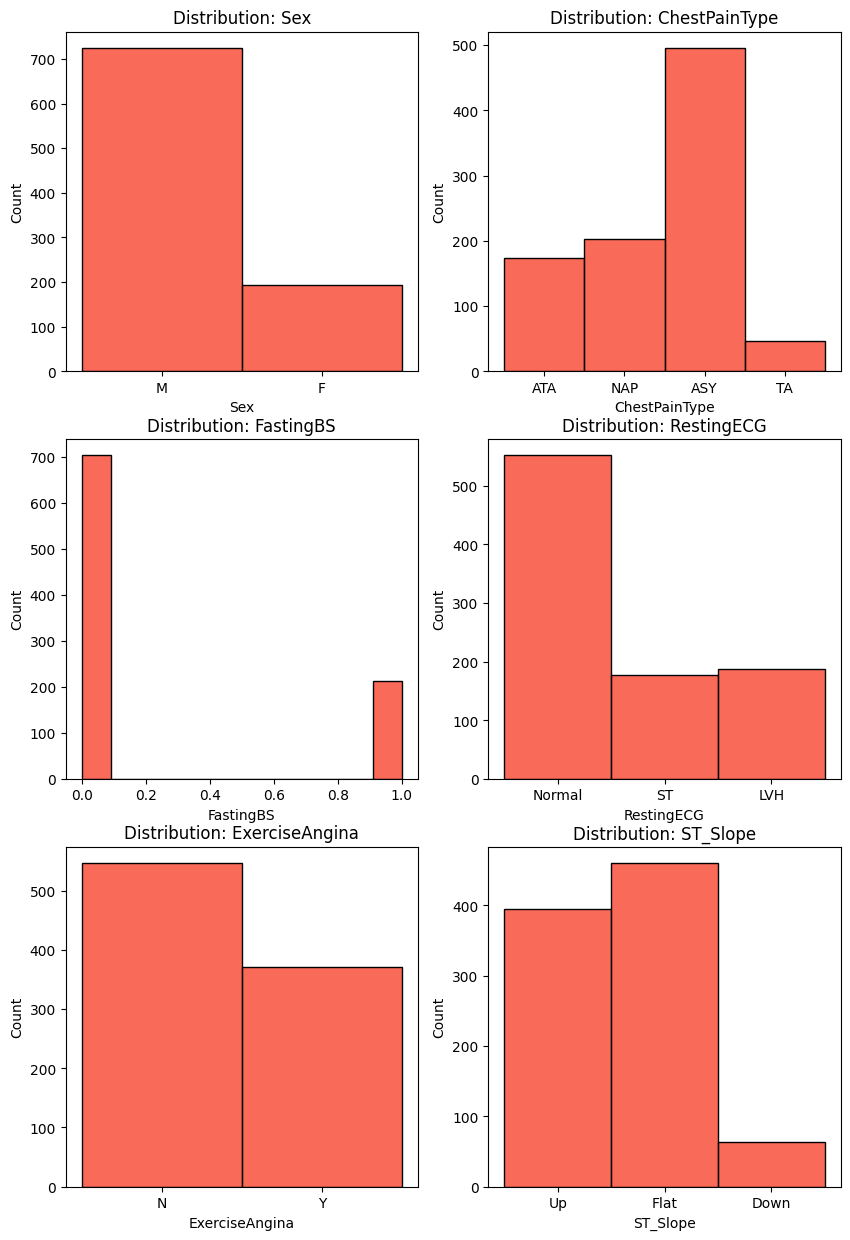

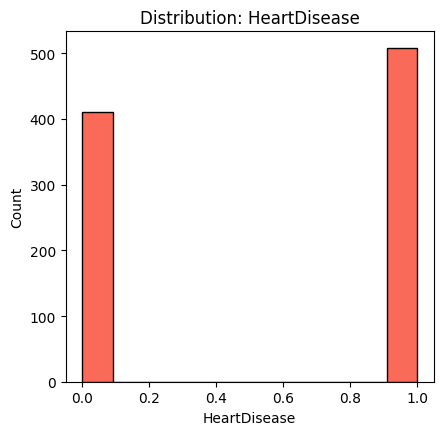

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Read CSV file into a DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Convert PySpark DataFrame to Pandas DataFrame
df1 = data.select('*').toPandas()

# Define colors for the plots
colors = ['#F93822']

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Plot distributions for each categorical feature
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i+1)
    sns.histplot(df1[categorical_features[i]], color=colors[0])
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

# Plot distribution for the last categorical feature separately
plt.figure(figsize=(4.75, 4.55))
sns.histplot(df1[categorical_features[-1]], color=colors[0])
title = 'Distribution: ' + categorical_features[-1]
plt.title(title)

# Show plots
plt.show()

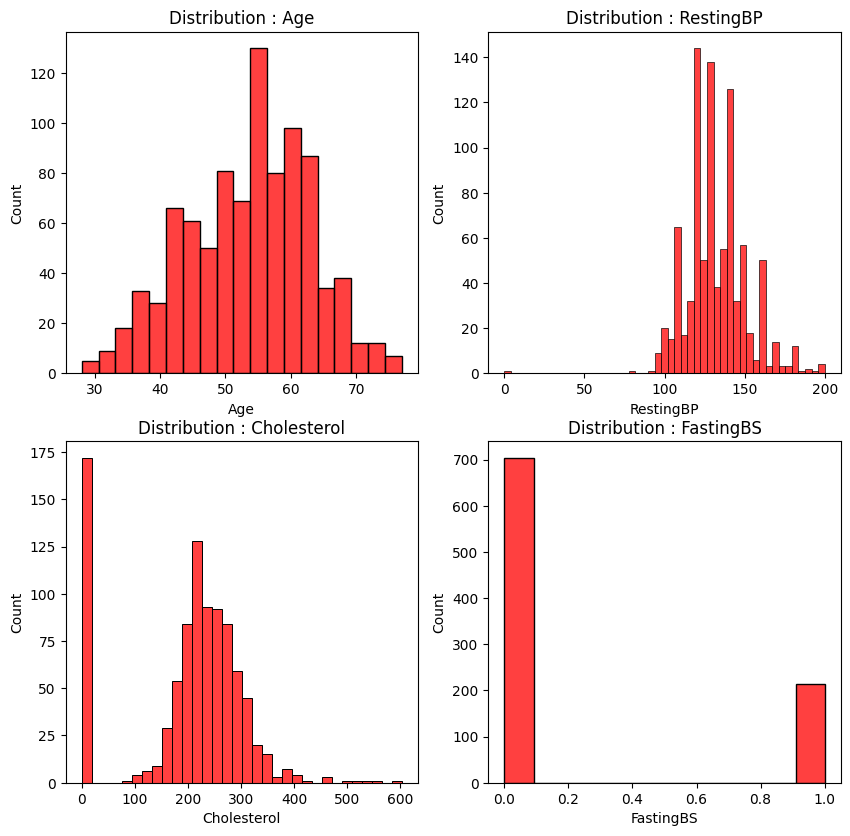

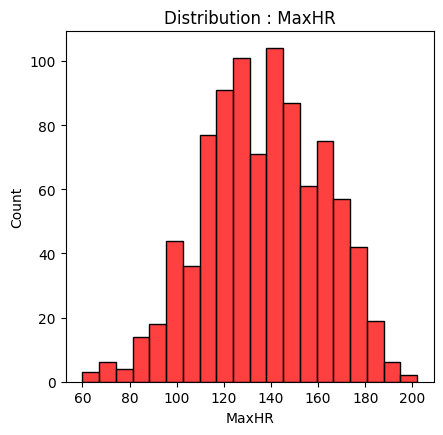

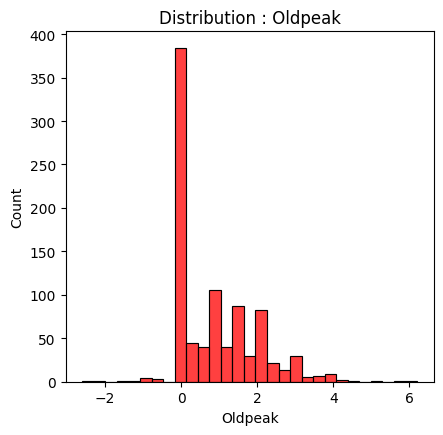

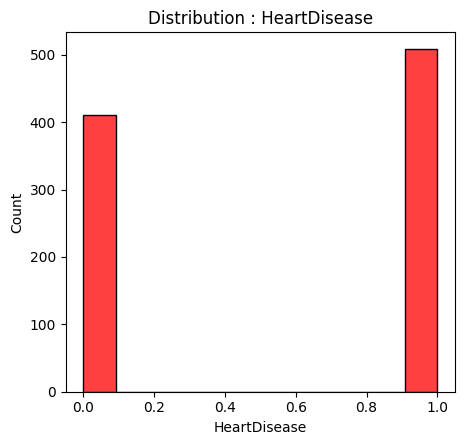

In [17]:
# Import necessary libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Create a SparkSession
spark = SparkSession.builder.appName("BigData").getOrCreate()

# Load data into a PySpark DataFrame
# Assuming you have a CSV file named 'data.csv'
df = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Define numerical features
numerical_features = [feature for feature in pandas_df.columns if pandas_df[feature].dtype != 'O']

# Define colors
colors = ['r']

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))
axs = axs.flatten()

# Plot distributions for numerical features
for i, feature in enumerate(numerical_features):
    if i < len(axs):
        sns.histplot(data=pandas_df, x=feature, color=colors[0], ax=axs[i])
        axs[i].set_title(f'Distribution : {feature}')
    else:
        fig, ax = plt.subplots(figsize=(4.75, 4.55))
        sns.histplot(data=pandas_df, x=feature, color=colors[0], ax=ax)
        ax.set_title(f'Distribution : {feature}')

# Show all plots
plt.tight_layout()
plt.show()

<ipython-input-18-67d6730281fa>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])


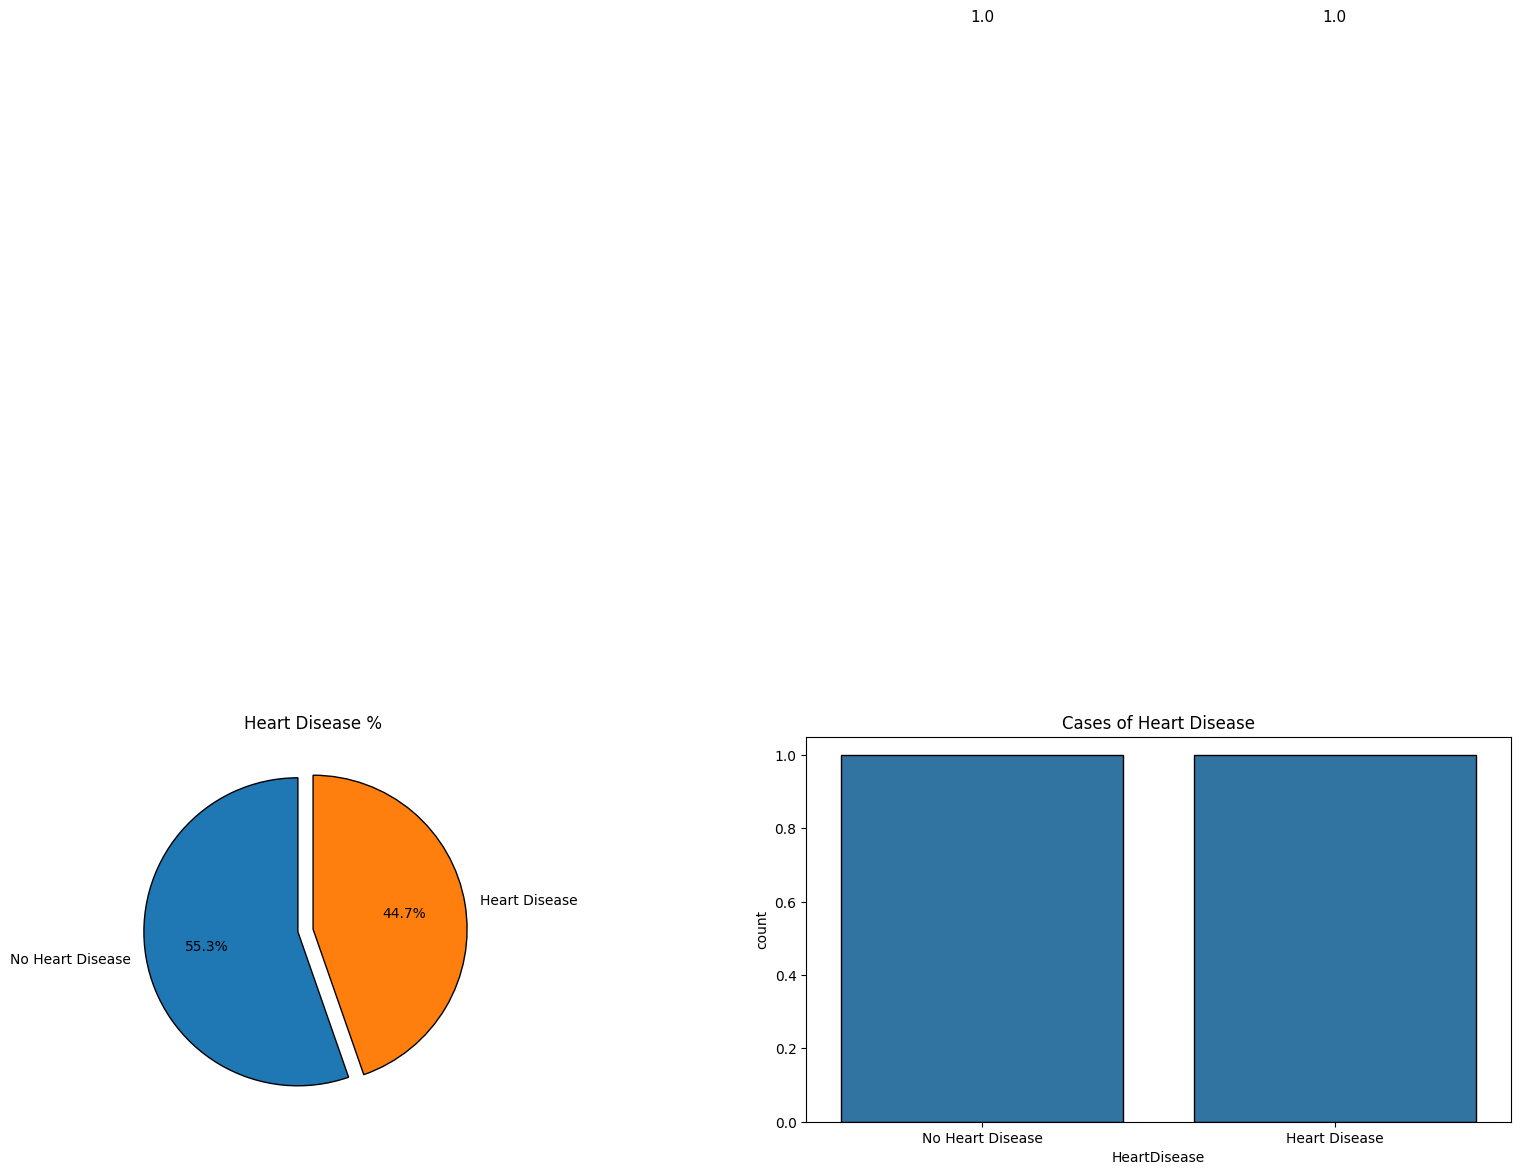

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a PySpark DataFrame
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Heart Disease Analysis") \
    .getOrCreate()

# Assuming 'data' is your PySpark DataFrame containing the 'HeartDisease' column
heart_disease_counts = data.groupBy('HeartDisease').count().collect()
heart_disease_counts = [row['count'] for row in heart_disease_counts]

# Calculate percentages
total_count = sum(heart_disease_counts)
circle = [count / total_count * 100 for count in heart_disease_counts]

# Plotting Pie chart
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Plotting Count plot
plt.subplot(1, 2, 2)
heart_disease_counts_df = data.groupBy('HeartDisease').count().toPandas()
sns.countplot(x='HeartDisease', data=heart_disease_counts_df, edgecolor='black')
ax = plt.gca()
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

# Show the plots
plt.show()

<ipython-input-19-767a05743331>:25: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column_name, data=data_pandas, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i // 2, i % 2])
<ipython-input-19-767a05743331>:25: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column_name, data=data_pandas, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i // 2, i % 2])
<ipython-input-19-767a05743331>:25: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column_name, data=data_pandas, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i // 2, i % 2])
<ipython-input-19-767a05743331>:25: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may pro

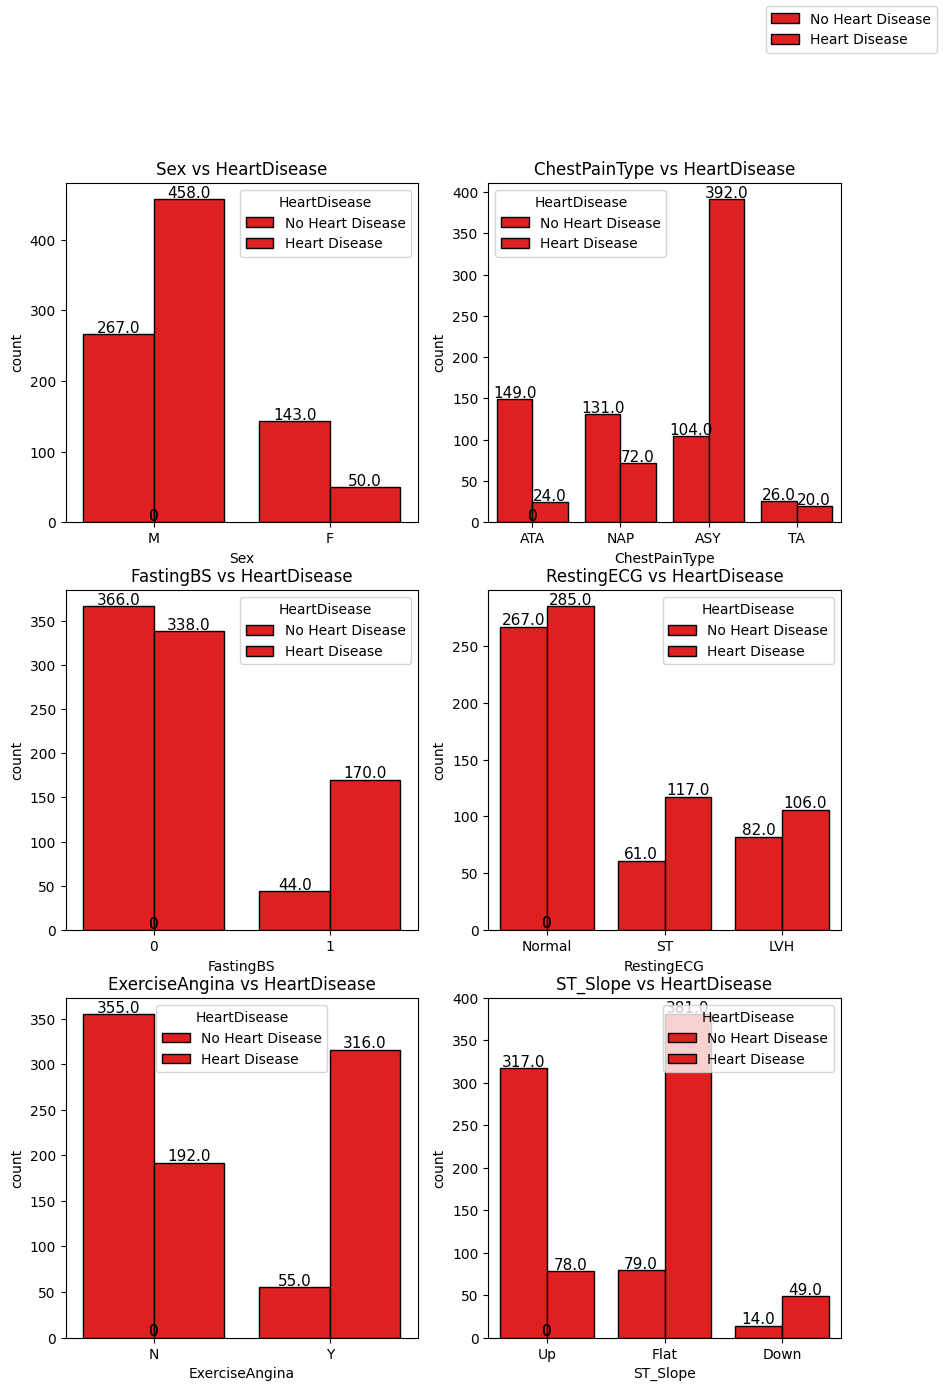

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a PySpark DataFrame
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Heart Disease Analysis") \
    .getOrCreate()

# Convert numerical values to categorical labels
data = data.withColumn('HeartDisease',
                       when(col('HeartDisease') == 0, 'No Heart Disease')
                       .otherwise('Heart Disease'))

# Convert PySpark DataFrame to Pandas DataFrame for plotting with Seaborn
data_pandas = data.toPandas()

# Now, plot the countplot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
legend_handles = []  # Empty list to store legend handles

for i, column_name in enumerate(categorical_features[:-1]):
    sns.countplot(x=column_name, data=data_pandas, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax[i // 2, i % 2])
    for rect in ax[i // 2, i % 2].patches:
        ax[i // 2, i % 2].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = f"{column_name} vs HeartDisease"
    ax[i // 2, i % 2].set_title(title)

    # Get legend handles
    handles, _ = ax[i // 2, i % 2].get_legend_handles_labels()
    legend_handles.extend(handles)

# Set legend outside the loop
fig.legend(legend_handles, ['No Heart Disease', 'Heart Disease'], loc='upper right')
plt.show()

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, sum

# Assuming 'data' is a PySpark DataFrame
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Heart Disease Analysis") \
    .getOrCreate()

# Filter data for cases with Heart Disease
heart_disease_data = data.filter(col('HeartDisease') == 1)

# Calculate percentages for each feature
sex_counts = heart_disease_data.groupBy('Sex').agg(count('*').alias('count')).collect()
sex = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(sex_counts, [sum(row['count']) for row in sex_counts])]

cp_counts = heart_disease_data.groupBy('ChestPainType').agg(count('*').alias('count')).collect()
cp = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(cp_counts, [sum(row['count']) for row in cp_counts])]

fbs_counts = heart_disease_data.groupBy('FastingBS').agg(count('*').alias('count')).collect()
fbs = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(fbs_counts, [sum(row['count']) for row in fbs_counts])]

restecg_counts = heart_disease_data.groupBy('RestingECG').agg(count('*').alias('count')).collect()
restecg = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(restecg_counts, [sum(row['count']) for row in restecg_counts])]

exang_counts = heart_disease_data.groupBy('ExerciseAngina').agg(count('*').alias('count')).collect()
exang = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(exang_counts, [sum(row['count']) for row in exang_counts])]

slope_counts = heart_disease_data.groupBy('ST_Slope').agg(count('*').alias('count')).collect()
slope = [count_row['count'] / sum_row * 100 if sum_row != 0 else 0 for count_row, sum_row in zip(slope_counts, [sum(row['count']) for row in slope_counts])]

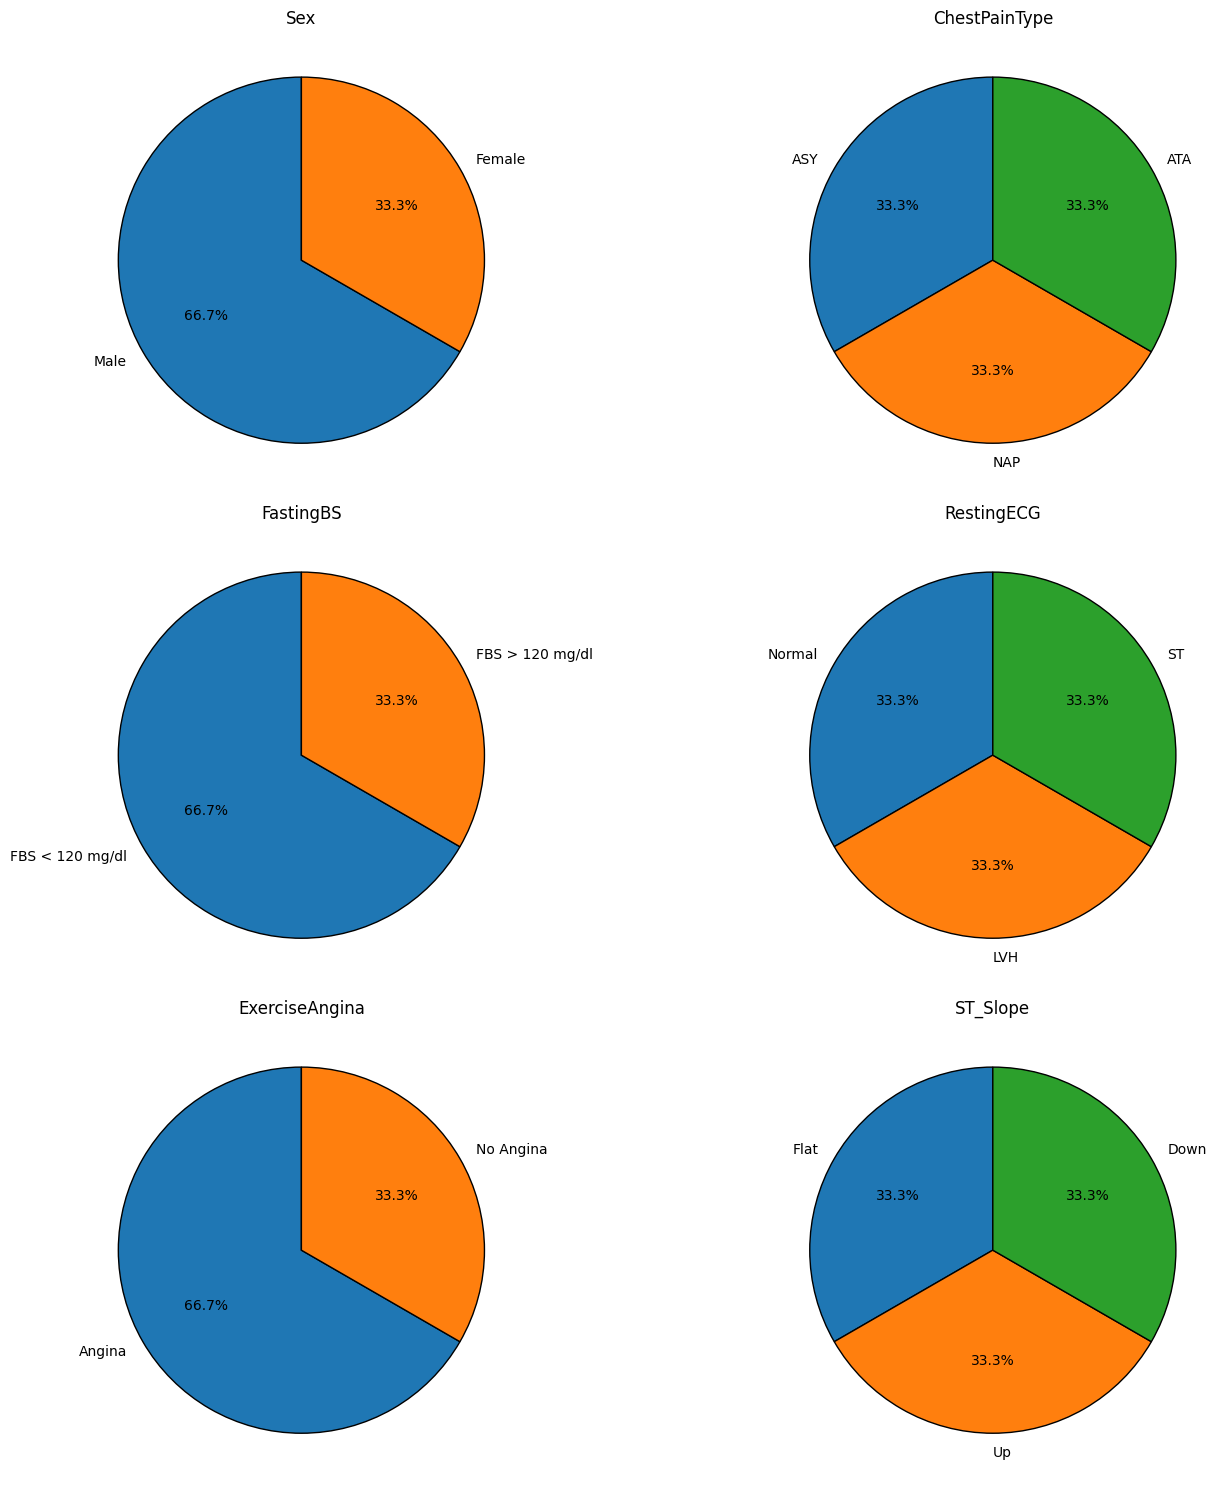

In [21]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit

# Create a SparkSession
spark = SparkSession.builder \
    .appName("PySpark Pie Chart") \
    .getOrCreate()

# Assuming you have your data loaded into Spark DataFrame, let's create a sample DataFrame for demonstration
# Replace this with your actual Spark DataFrame
data = [
    ("Male", "ASY", "FBS < 120 mg/dl", "Normal", "Angina", "Flat"),
    ("Female", "NAP", "FBS > 120 mg/dl", "ST", "No Angina", "Up"),
    ("Male", "ATA", "FBS < 120 mg/dl", "LVH", "Angina", "Down"),
    # Add more data rows as needed
]
columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

df = spark.createDataFrame(data, columns)

# Count the occurrences of each value in each column
counts = {col: df.groupBy(col).count().collect() for col in columns}

# Function to plot pie chart
def plot_pie_chart(data, labels, title):
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(title)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, col in enumerate(columns):
    ax = plt.subplot(3, 2, i + 1)
    counts_data = [count["count"] for count in counts[col]]
    labels_data = [count[col] for count in counts[col]]
    plot_pie_chart(counts_data, labels_data, col)

plt.tight_layout()
plt.show()

# Stop the SparkSession
spark.stop()


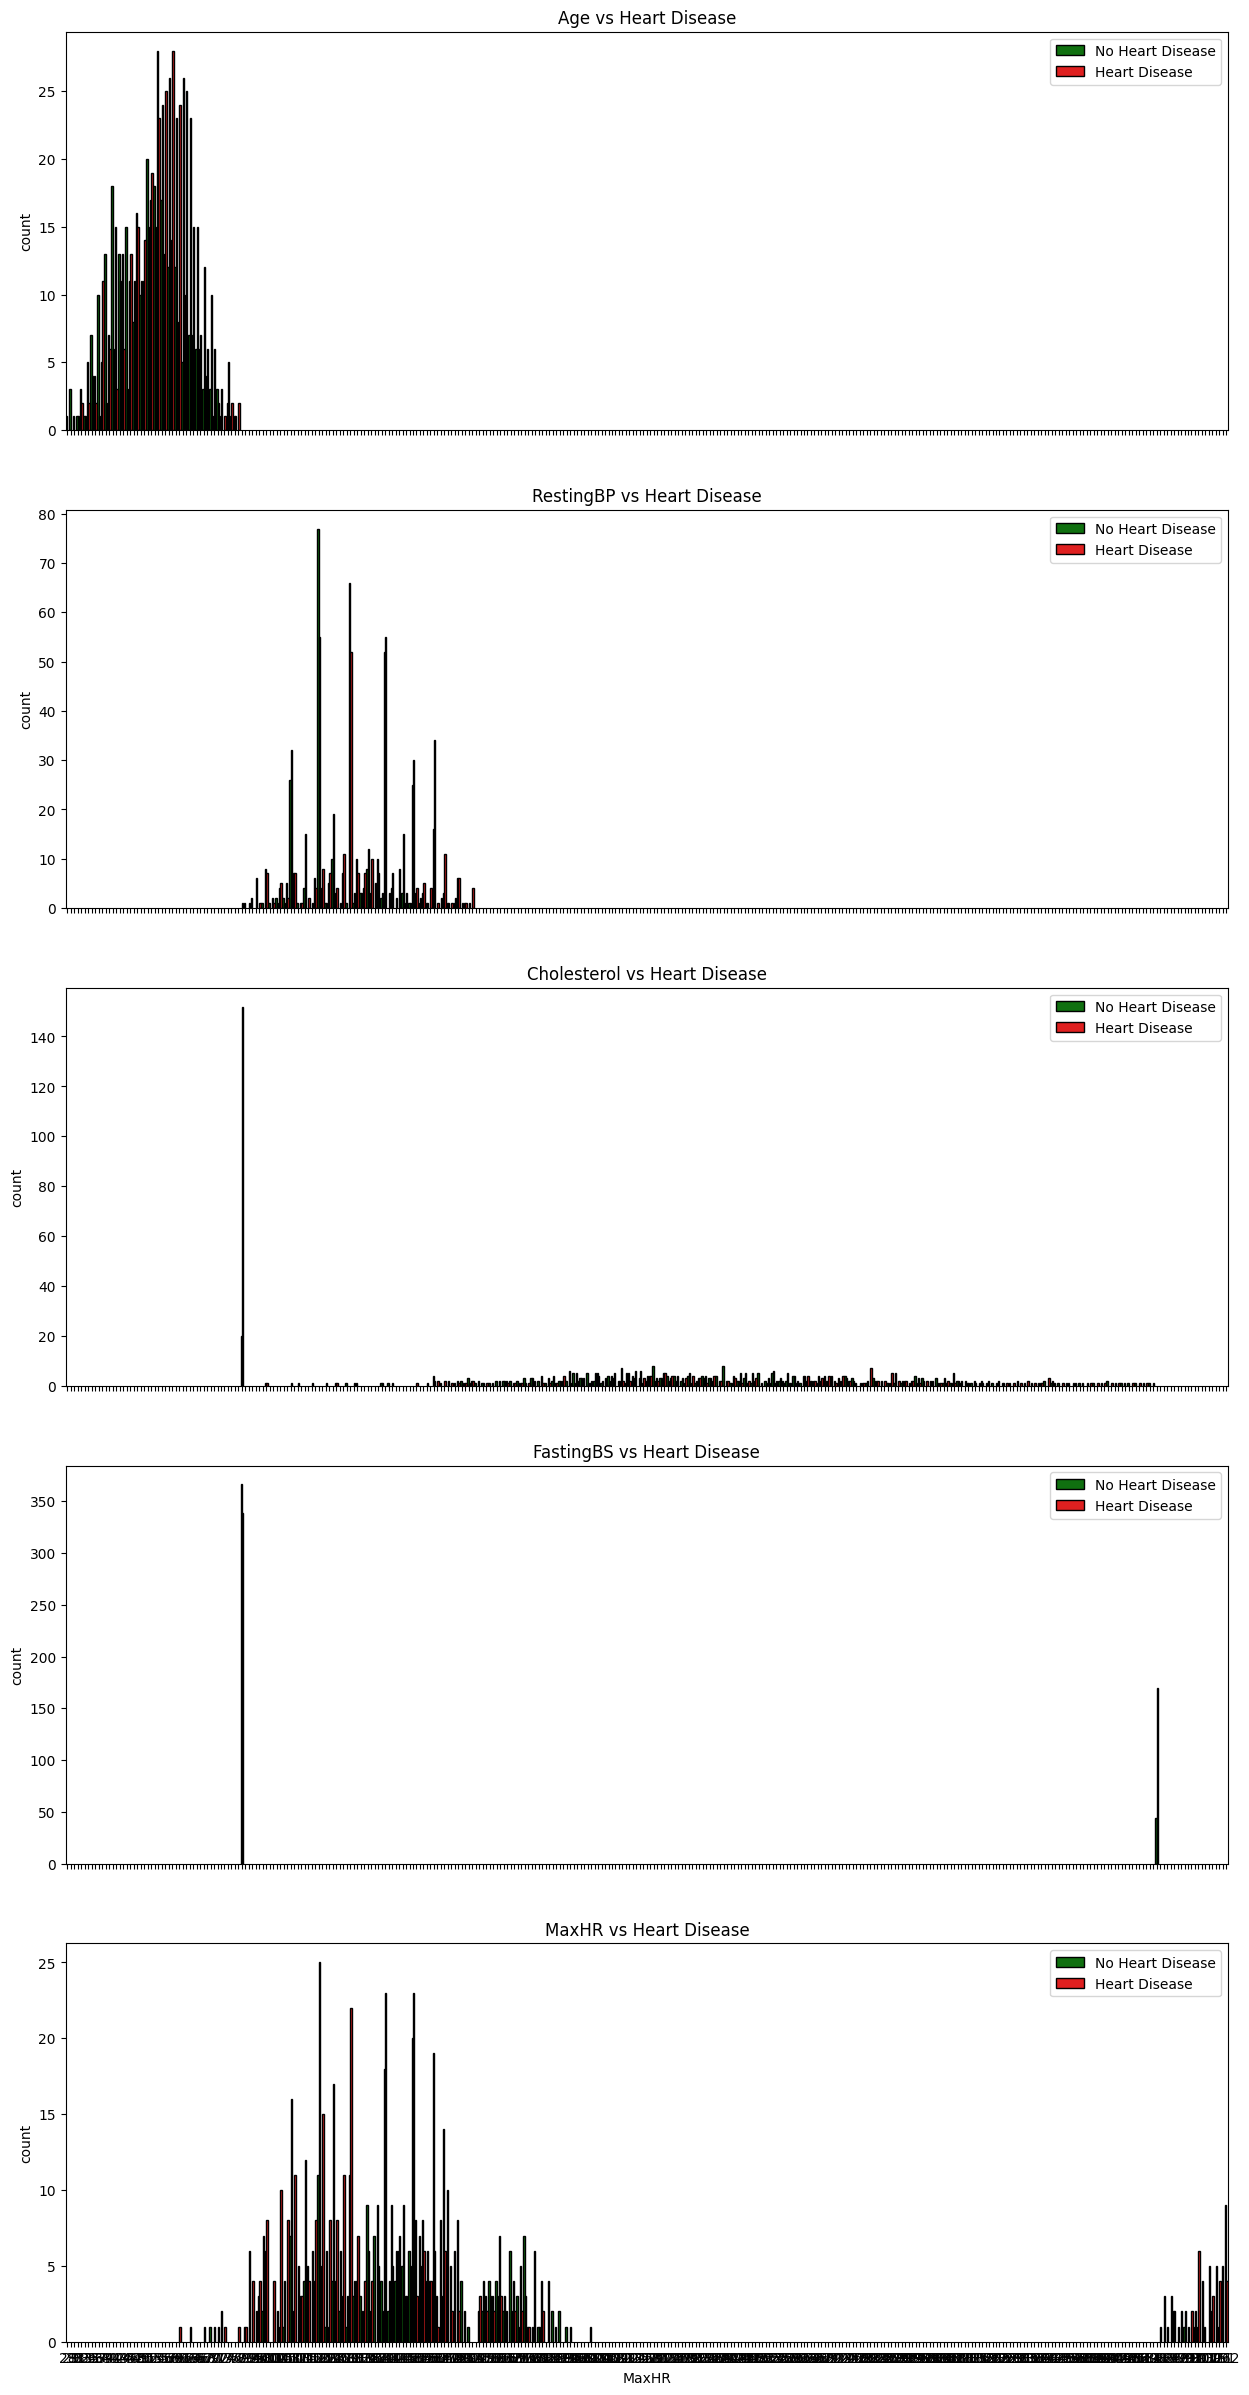

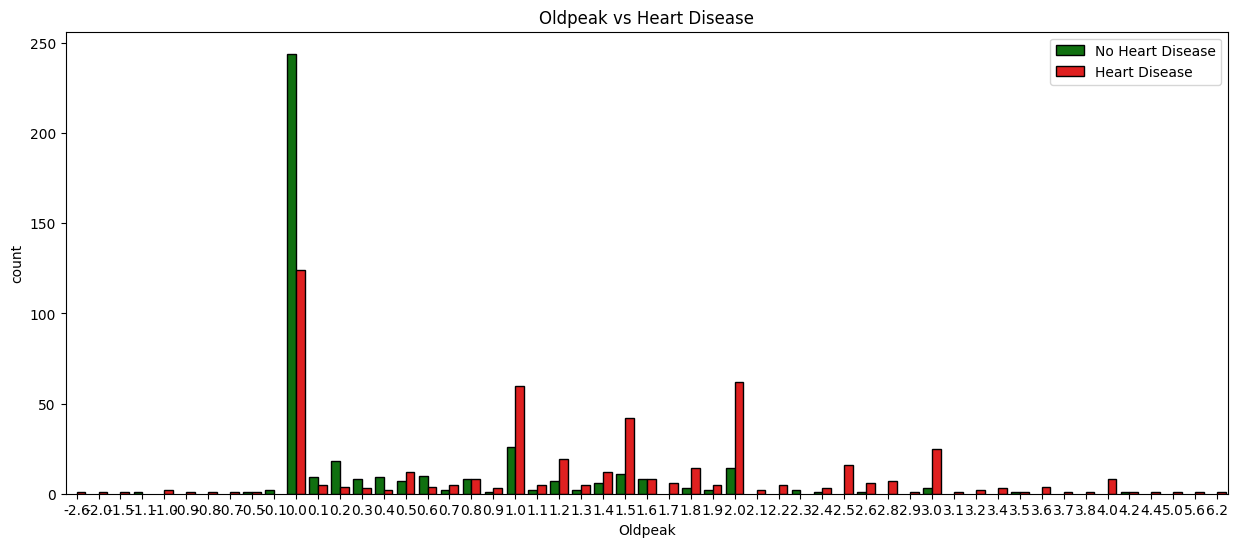

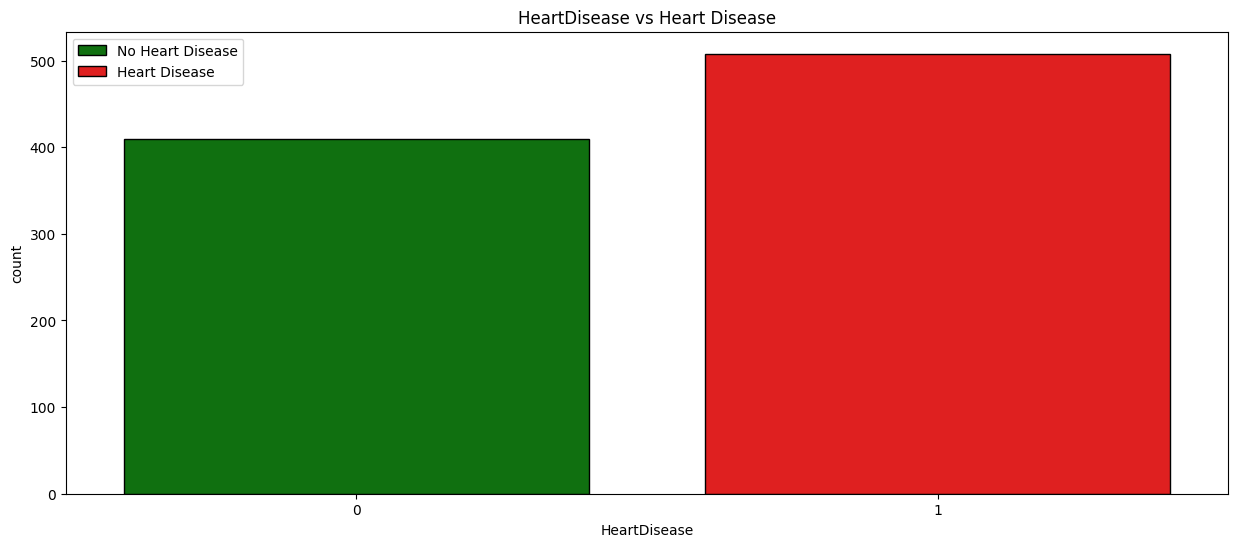

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file into a DataFrame
df = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Define numerical features
numerical_features = [feature for feature in pandas_df.columns if pandas_df[feature].dtype != 'O']

# Define colors
colors = ['green', 'red']

# Initialize figure and axes
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 30), sharex=True)
axs = axs.flatten()

# Plot countplots for numerical features
num_subplots = len(axs)
max_subplots = num_subplots
for i, feature in enumerate(numerical_features):
    if i < num_subplots:
        ax = axs[i]
    elif i < max_subplots:
        ax = fig.add_subplot(max_subplots, 1, i + 1)
    else:
        fig, ax = plt.subplots(figsize=(15, 6))

    sns.countplot(data=pandas_df, x=feature, hue='HeartDisease', palette=colors, edgecolor='black', ax=ax)
    ax.set_title(f'{feature} vs Heart Disease')
    ax.legend(['No Heart Disease', 'Heart Disease'])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

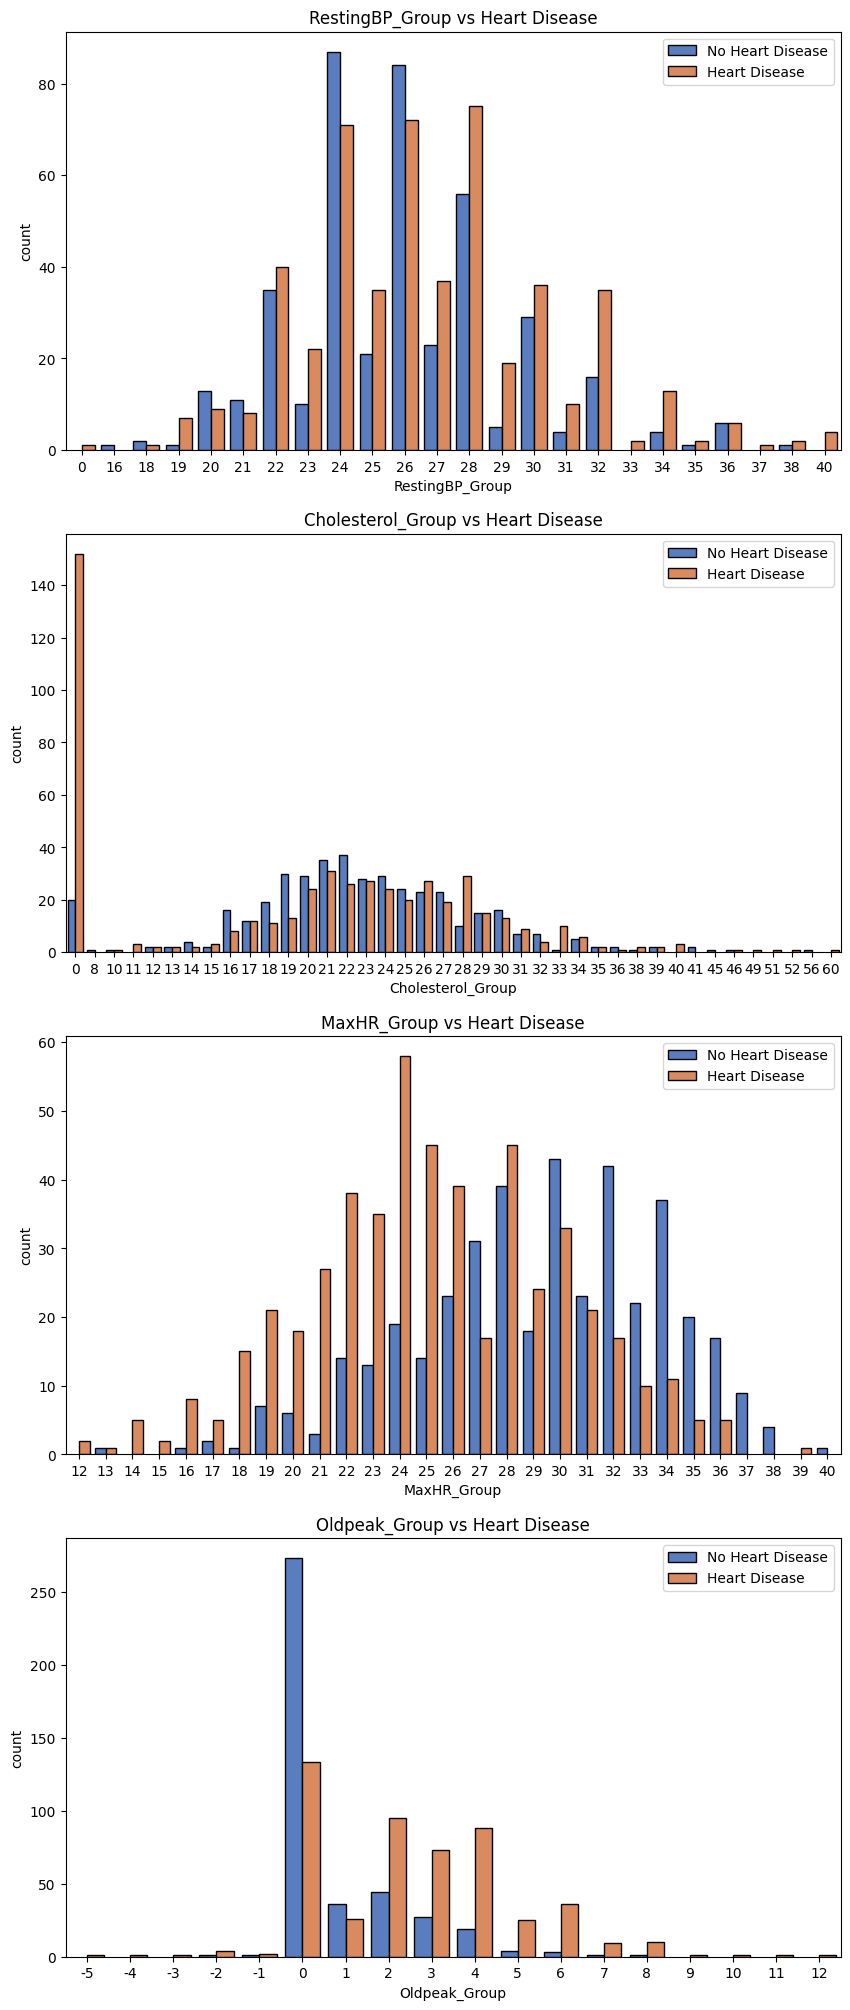

In [25]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("HeartDiseaseAnalysis") \
    .getOrCreate()

# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Plotting
group_numerical_features = ['RestingBP_Group', 'Cholesterol_Group', 'MaxHR_Group', 'Oldpeak_Group']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))

for i, feature in enumerate(group_numerical_features):
    plt.subplot(4, 1, i + 1)
    sns.countplot(x=feature, data=data.toPandas(), hue="HeartDisease", palette='muted', edgecolor='black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = f"{feature} vs Heart Disease"
    plt.title(title)

plt.show()


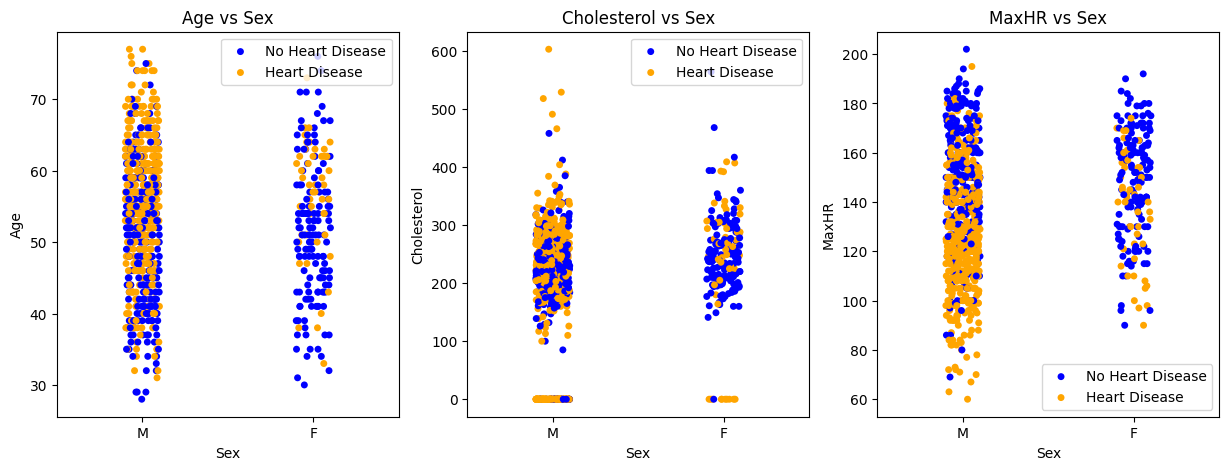

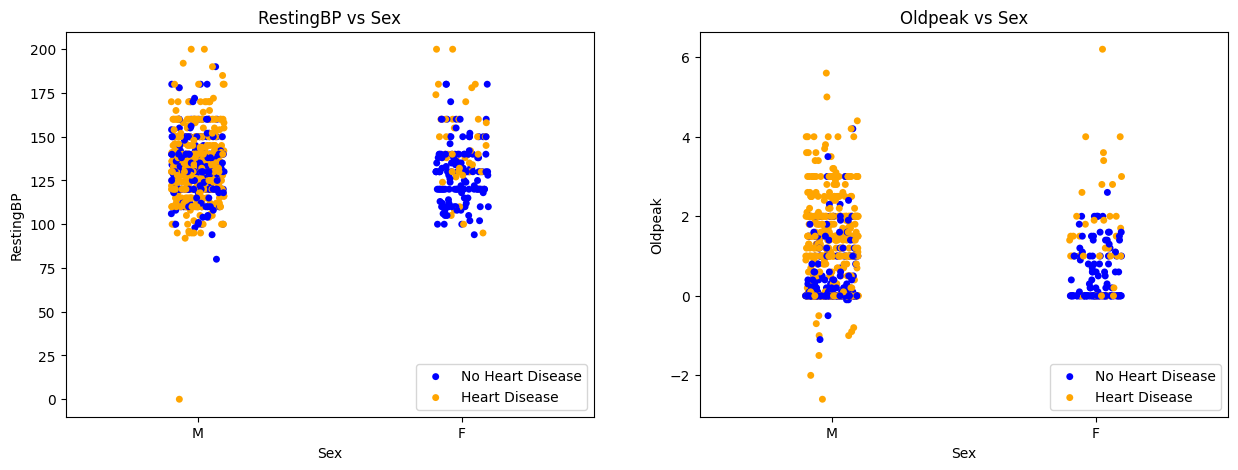

In [26]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))
# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);
plt.show()

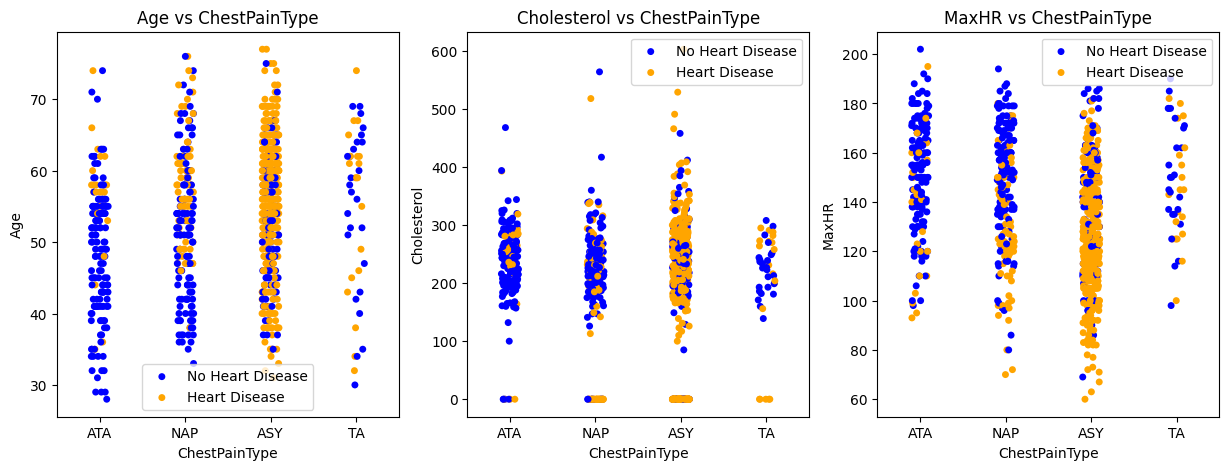

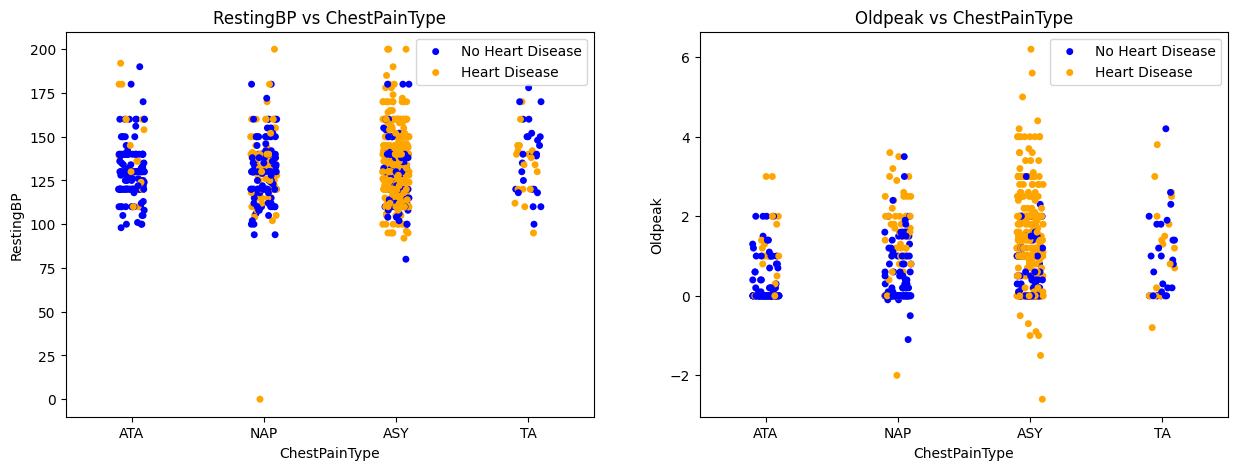

In [27]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);
plt.show()

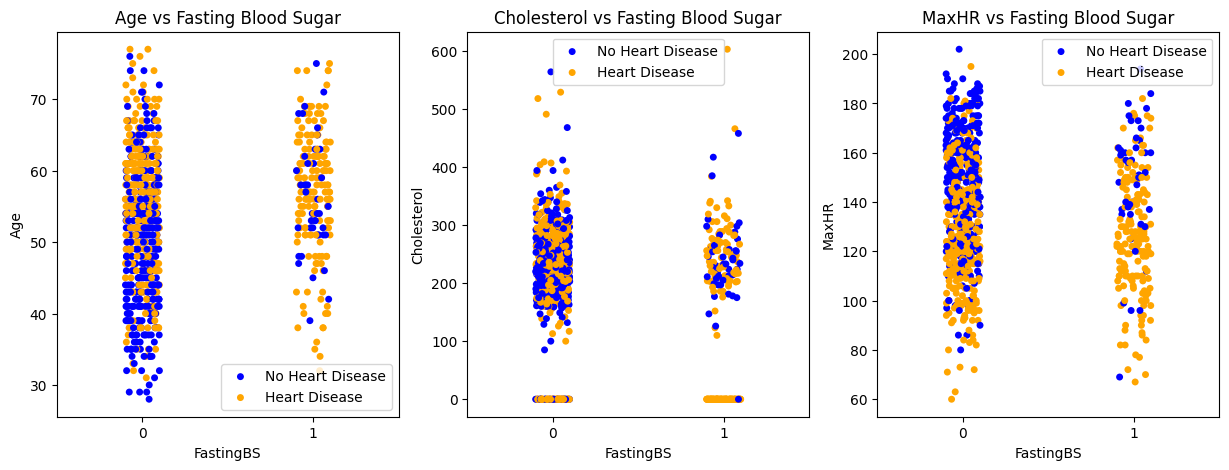

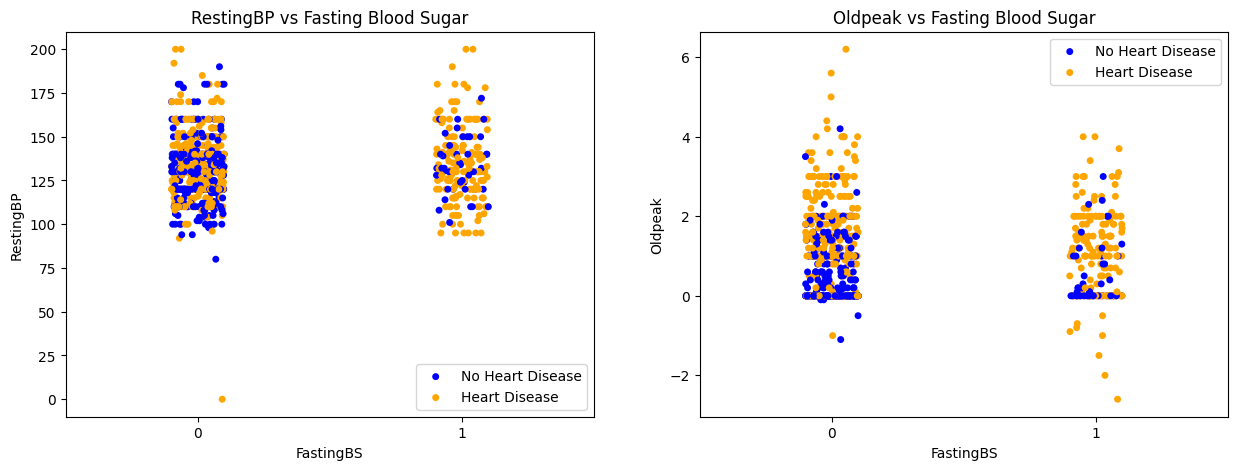

In [28]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

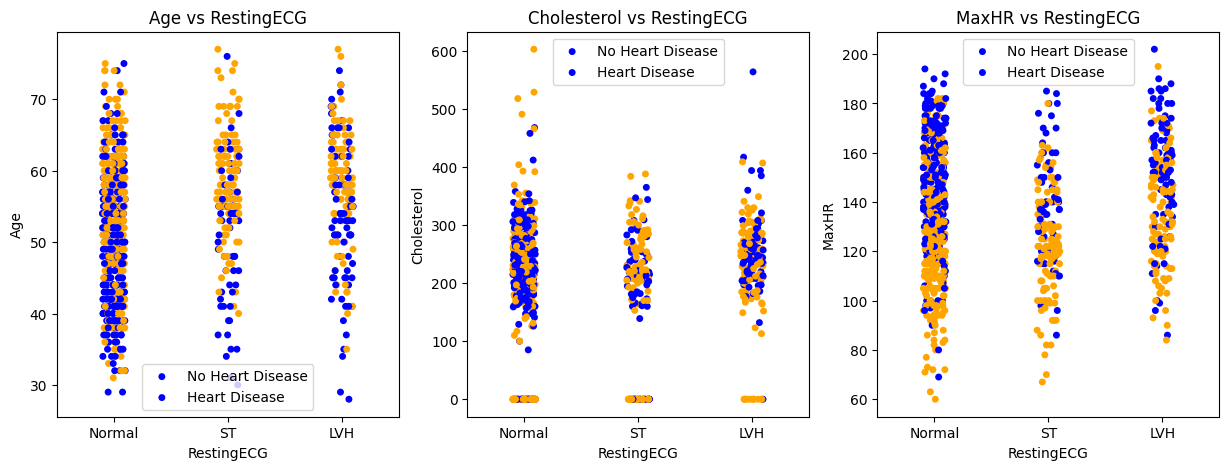

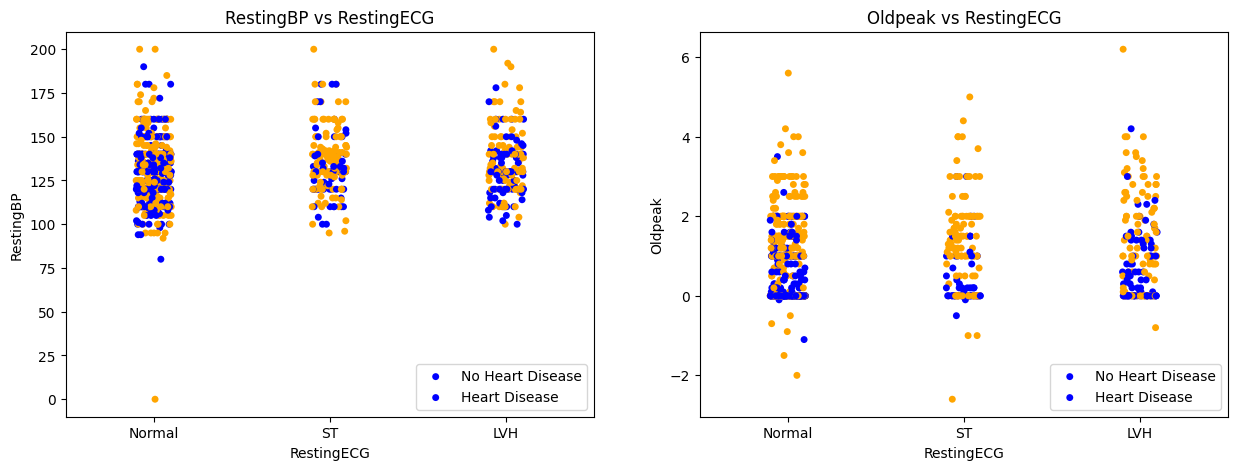

In [29]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

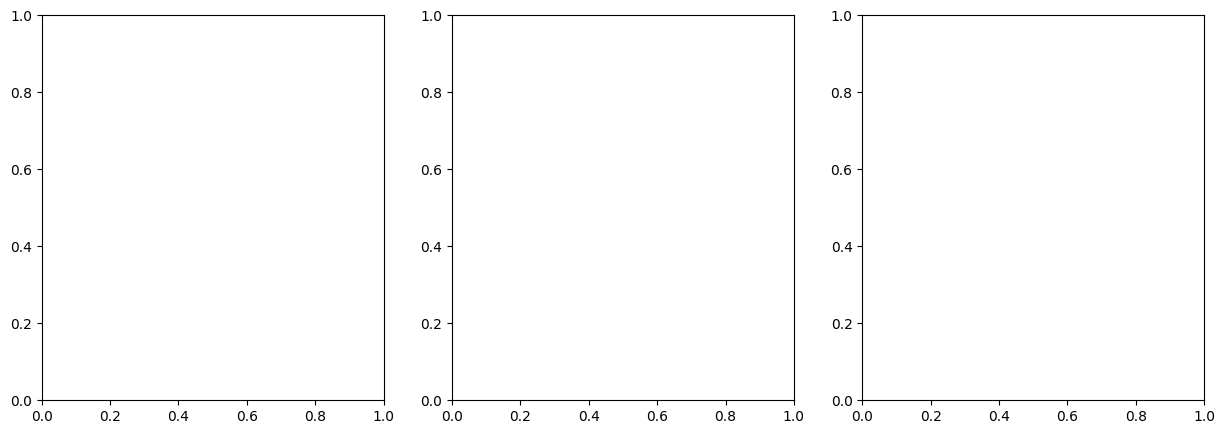

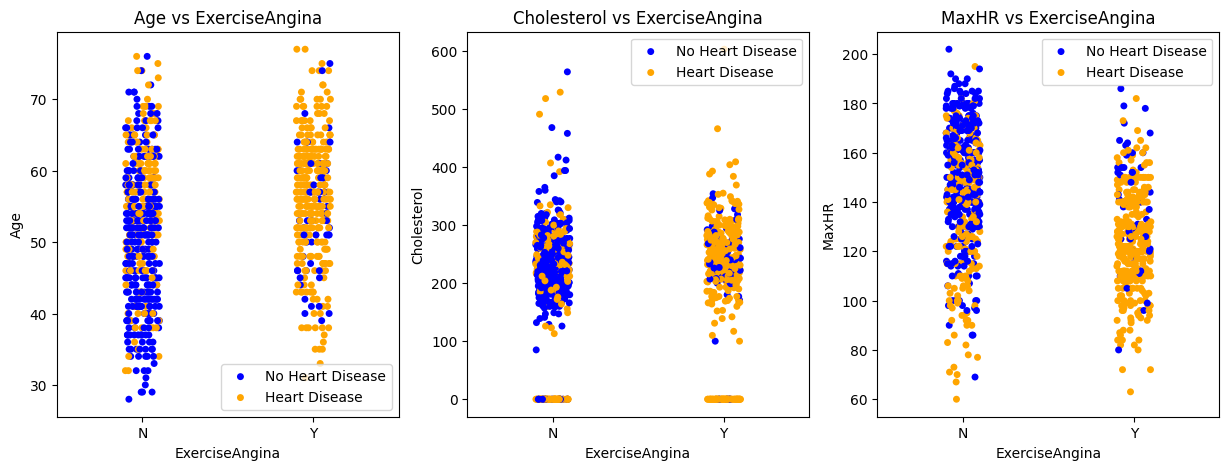

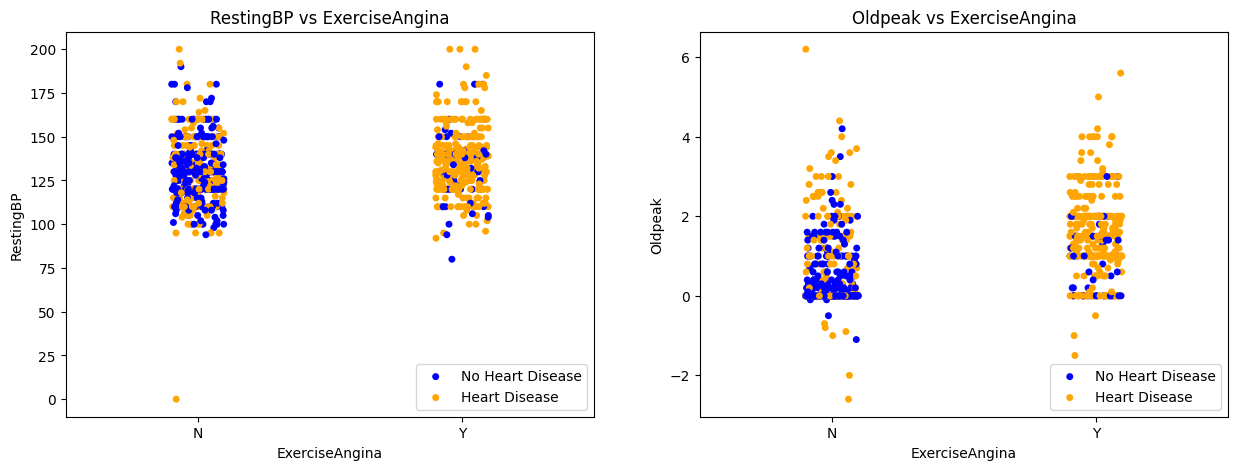

In [30]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

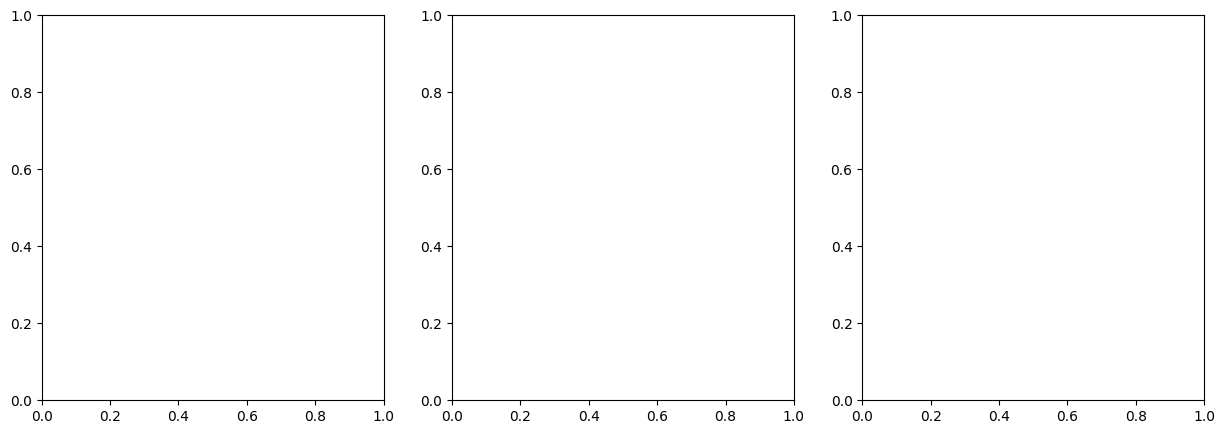

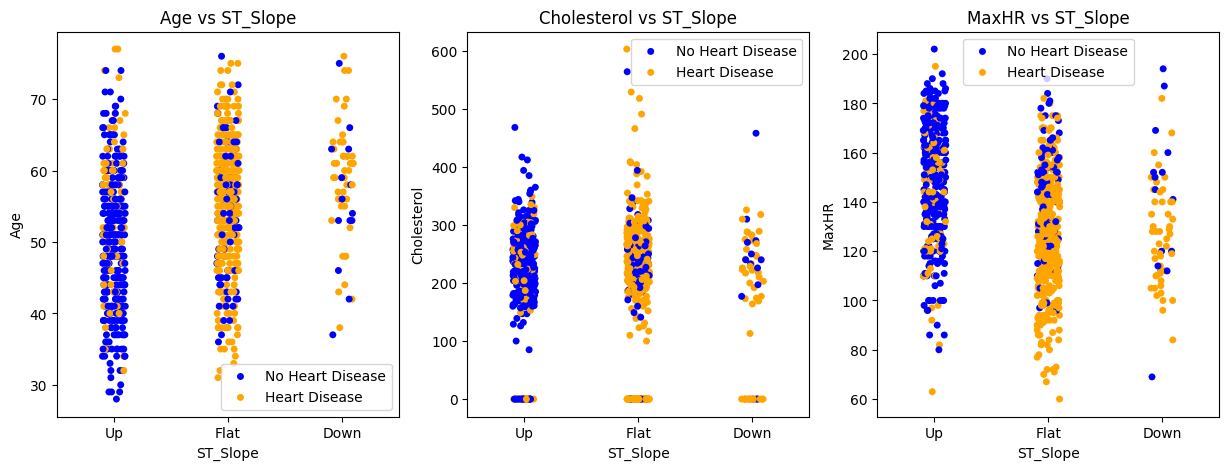

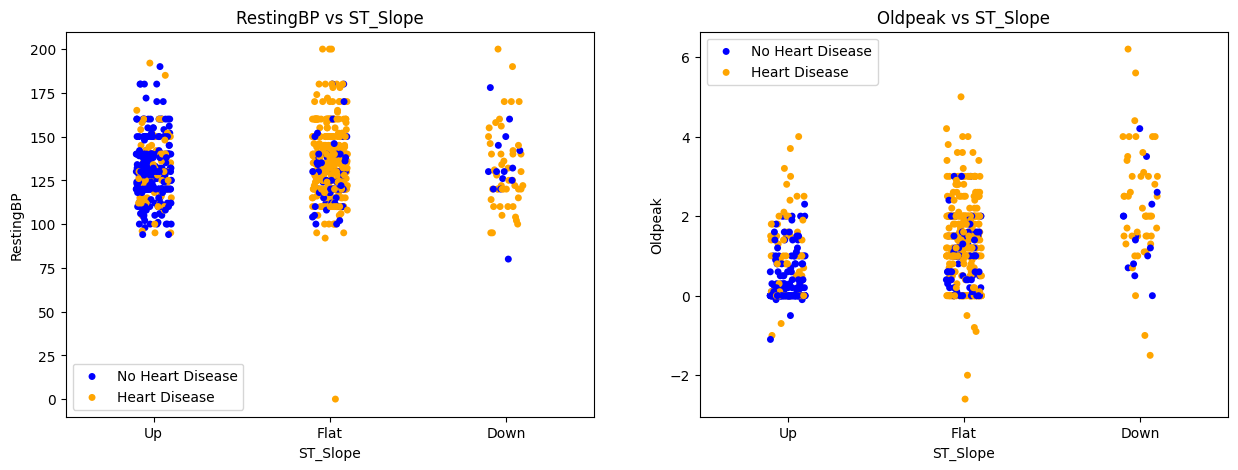

In [31]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

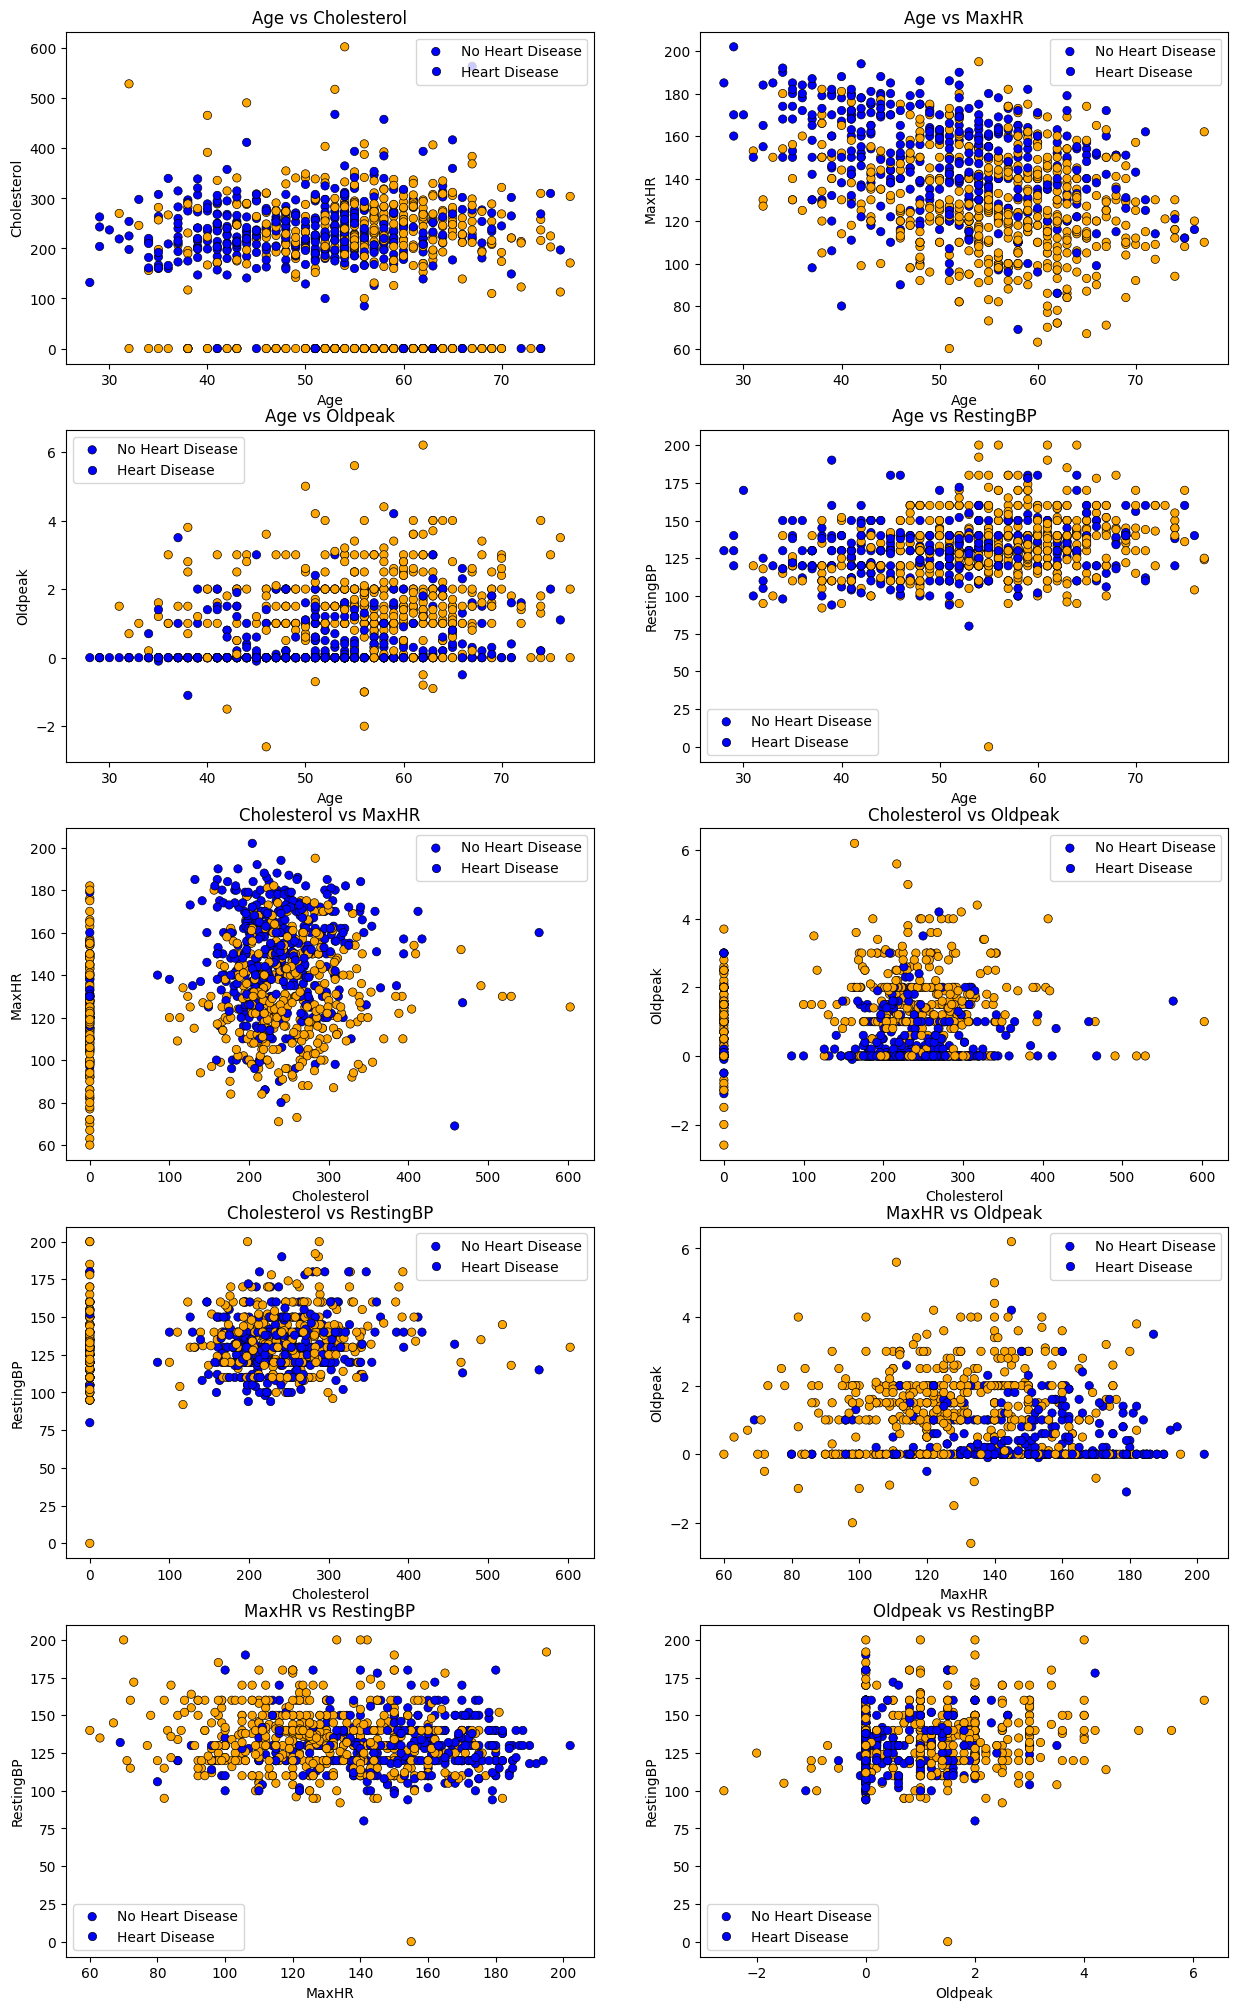

In [32]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("BigData") \
    .getOrCreate()

# Assuming you have pyspark DataFrame
# If not, you can use spark.read.csv to read the CSV file into a pyspark DataFrame

# Assuming data is a pyspark DataFrame
# If you have a pandas DataFrame, you can convert it to a pyspark DataFrame using spark.createDataFrame()
# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Convert RestingBP, Cholesterol, MaxHR, and Oldpeak
# columns to respective groups
data = data.withColumn("RestingBP_Group", (col("RestingBP") / 5).cast("int")) \
    .withColumn("Cholesterol_Group", (col("Cholesterol") / 10).cast("int")) \
    .withColumn("MaxHR_Group", (col("MaxHR") / 5).cast("int")) \
    .withColumn("Oldpeak_Group", round((col("Oldpeak") * 10) / 5).cast("int"))

# Assuming numerical_features is a list of numerical column names
numerical_features = ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']
colors = ["blue", "orange"]

# Convert Spark DataFrame to Pandas DataFrame
data = data.toPandas()
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

In [33]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import MinMaxScaler, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline

# Assuming 'spark' is your SparkSession object
spark = SparkSession.builder \
    .appName("ScalerExample") \
    .getOrCreate()

# Assuming 'data' is a PySpark DataFrame
data = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define the features to be scaled
features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# VectorAssembler to assemble all features into a single vector column
assembler = VectorAssembler(inputCols=features, outputCol="features")
data = assembler.transform(data)

# Define the scaler stages for the pipeline
stages = []

# MinMaxScaler for 'features'
min_max_scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
stages.append(min_max_scaler)

# Create pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline
pipeline_model = pipeline.fit(data)

# Transform the dataframe
scaled_df = pipeline_model.transform(data)

# Select only the scaled features
scaled_df.select("scaled_features").show(truncate=False)


+----------------------------------------------------------------------------------------------------+
|scaled_features                                                                                     |
+----------------------------------------------------------------------------------------------------+
|[0.24489795918367346,0.7000000000000001,0.47927031509121065,0.7887323943661972,0.29545454545454547] |
|[0.42857142857142855,0.8,0.2985074626865672,0.676056338028169,0.40909090909090906]                  |
|[0.18367346938775508,0.65,0.46932006633499174,0.26760563380281693,0.29545454545454547]              |
|[0.4081632653061224,0.6900000000000001,0.3548922056384743,0.3380281690140845,0.46590909090909083]   |
|[0.5306122448979591,0.75,0.32338308457711445,0.4366197183098592,0.29545454545454547]                |
|[0.22448979591836732,0.6,0.5621890547263682,0.7746478873239436,0.29545454545454547]                 |
|[0.3469387755102041,0.65,0.39303482587064675,0.7746478873239436,0.295454

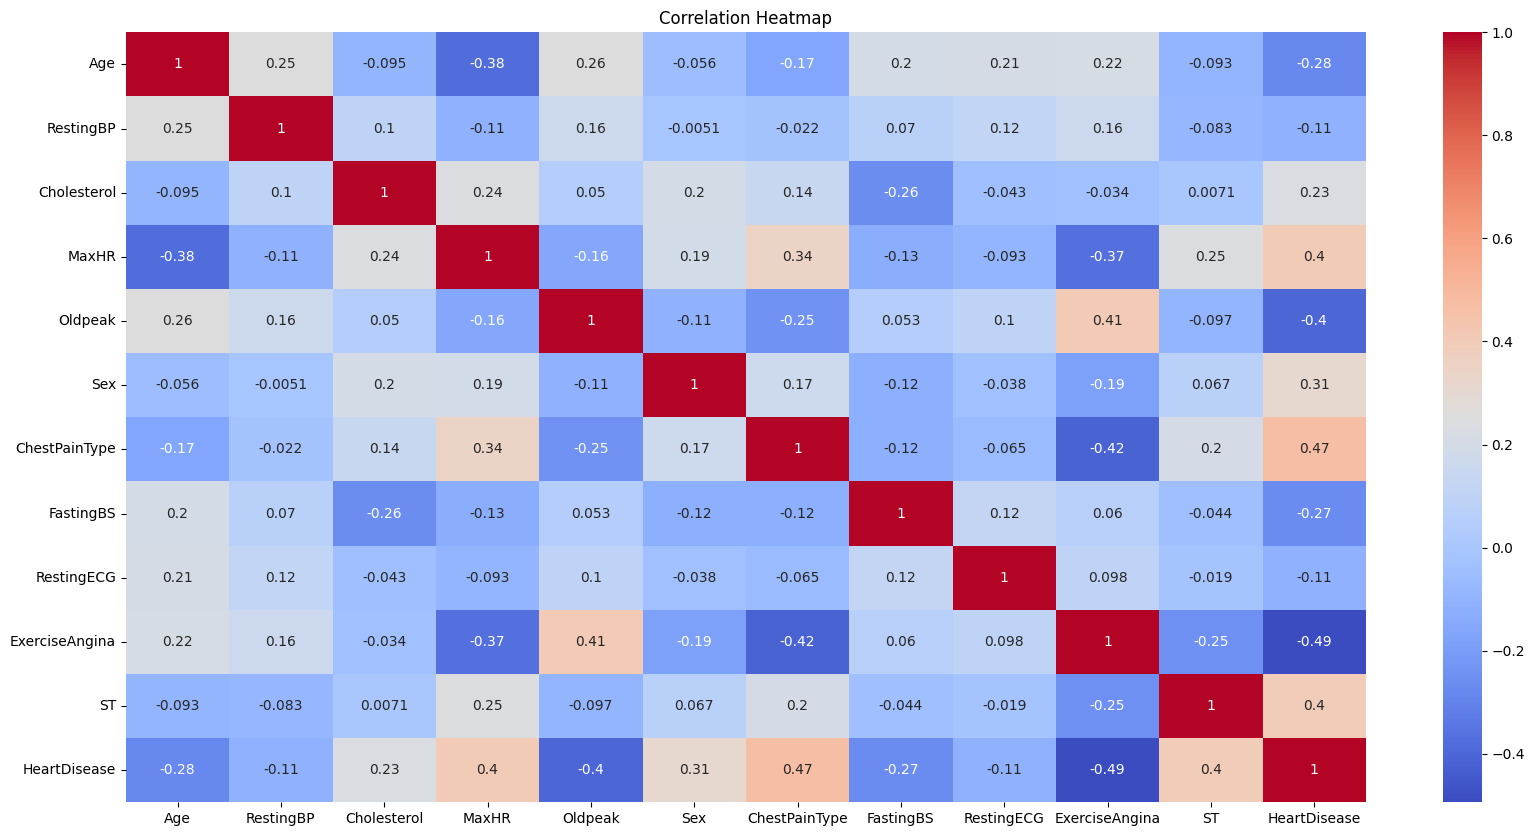

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Create a SparkSession
spark = SparkSession.builder \
    .appName("HeatMap") \
    .getOrCreate()

# Read the CSV file into a PySpark DataFrame
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Convert categorical columns to numerical representation
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(df1) for col in categorical_cols]
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df1).transform(df1)

# Concatenate indexed categorical columns with numerical columns
numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
all_cols = numeric_cols + [col+"_index" for col in categorical_cols]

# Select relevant columns
df_selected = df_indexed.select(*all_cols)

# Convert numeric columns to vector
assembler = VectorAssembler(inputCols=all_cols, outputCol="features")
df_assembled = assembler.transform(df_selected)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_assembled, "features").head()
corr_matrix = correlation_matrix[0].toArray()

# Convert correlation matrix to pandas DataFrame
pdf = pd.DataFrame(corr_matrix, columns=all_cols)

# Remove the "_index" suffix from column names
pdf.columns = [col.split("_")[0] if "_index" in col else col for col in pdf.columns]

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(pdf, annot=True, cmap='coolwarm', xticklabels=pdf.columns, yticklabels=pdf.columns)
plt.title("Correlation Heatmap")
plt.show()

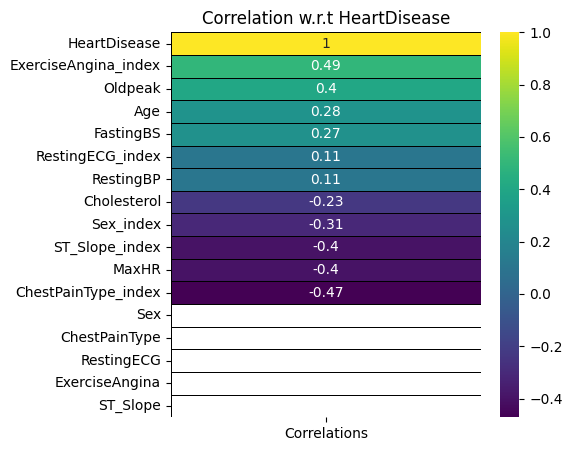

In [72]:
# Assuming you have already initialized SparkSession as 'spark'
from pyspark.sql import functions as F
import seaborn as sns
import pandas as pd

# Calculate correlations with HeartDisease
correlations = df1.select(*(F.corr(F.col('HeartDisease'), F.col(col)).alias(col) for col in df1.columns))

# Convert to Pandas DataFrame
correlations_df = correlations.toPandas().transpose()
correlations_df.columns = ['Correlations']
correlations_df = correlations_df.sort_values(by='Correlations', ascending=False)

# Plot using seaborn and matplotlib
plt.subplots(figsize=(5, 5))
sns.heatmap(correlations_df, annot=True, cmap='viridis', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t HeartDisease')
plt.show()


In [62]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import ChiSqSelector

# Assuming 'df1' is your PySpark DataFrame containing categorical features and target
# Assuming 'categorical_features' is a list of column names representing categorical features

# Selecting only the features columns
features = df1.select(*categorical_features[:-1])

# Converting target column to numerical label column
from pyspark.ml.feature import StringIndexer
stringIndexer = StringIndexer(inputCol=categorical_features[-1], outputCol="label")
model = stringIndexer.fit(df1)
df1 = model.transform(df1)

# Assemble features into a single column
assembler = VectorAssembler(inputCols=features.columns, outputCol="features")
assembled_df = assembler.transform(df1)

# Applying ChiSqSelector for feature selection
selector = ChiSqSelector(numTopFeatures=len(features.columns), featuresCol="features", outputCol="selectedFeatures", labelCol="label")
model = selector.fit(assembled_df)
selected_features_df = model.transform(assembled_df)

# Extracting selected features with their Chi squared scores
selected_feature_scores = [(feature, score) for feature, score in zip(features.columns, model.selectedFeatures)]
selected_feature_scores_df = spark.createDataFrame(selected_feature_scores, ["Feature", "Chi Squared Score"])

# Displaying the selected features with their Chi squared scores
selected_feature_scores_df.show()

# Note: Plotting heatmap is not directly available in PySpark. You may need to export data to pandas and then plot using seaborn as in your original code.



NameError: name 'categorical_features' is not defined

In [47]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.feature import ChiSqSelector
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("FeatureSelection") \
    .getOrCreate()

# Assuming 'df1' is a Spark DataFrame containing both numerical and categorical features
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)
# Assuming 'numerical_features' and 'categorical_features' are already defined

# Index categorical features
indexers = [StringIndexer(inputCol=col, outputCol=col+"_indexed").fit(df1) for col in categorical_features]
indexed_df = df1
for indexer in indexers:
    indexed_df = indexer.transform(indexed_df)

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=numerical_features + [col + "_indexed" for col in categorical_features], outputCol="features")
df_assembled = assembler.transform(indexed_df)

# Select the target categorical feature
target_feature = categorical_features[-1]

# Apply ChiSqSelector to select features based on chi-squared test
selector = ChiSqSelector(numTopFeatures=len(numerical_features), featuresCol="features",
                         outputCol="selectedFeatures", labelCol=target_feature + "_indexed")
model = selector.fit(df_assembled)
selected_features = model.selectedFeatures

# Get feature scores from ChiSqSelector model
feature_scores = model.selectedFeatures

# Extract the names of the selected features
selected_feature_names = [numerical_features[i] for i in selected_features] + [categorical_features[i] + "_indexed" for i in selected_features]

# Create a DataFrame with feature scores
featureScores = pd.DataFrame(zip(selected_feature_names, feature_scores), columns=['Feature', 'ChiSq Score'])

# Plot the heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='ChiSq Score', ascending=False), annot=True, cmap='viridis',
            linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')

plt.show()

# Stop SparkSession
spark.stop()


IndexError: list index out of range

In [1]:
!pip install --upgrade scikit-learn

ROC AUC: 0.9182974559686891


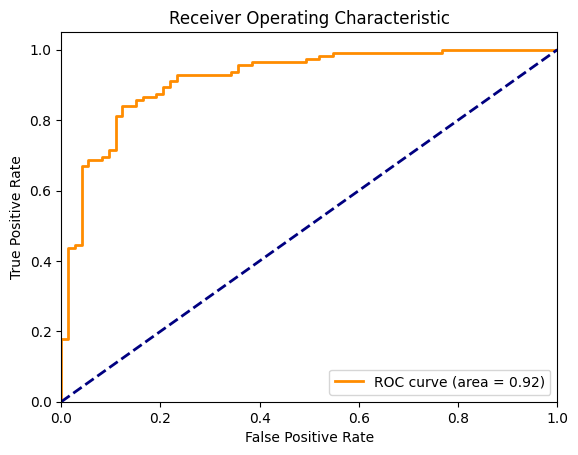

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import numpy as np

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("LogisticRegressionExample") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
model = classifier_lr.fit(train)

# Make predictions on test data
predictions = model.transform(test)

# Compute ROC AUC score
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
roc_auc = evaluator.evaluate(predictions)

print("ROC AUC:", roc_auc)

# Extract probability and label from predictions
results = predictions.select(['probability', target_column]).collect()
probabilities = np.array([x[0][1] for x in results])
labels = np.array([x[1] for x in results])

# Compute ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stop SparkSession
spark.stop()


AUC: 0.9182974559686891
Accuracy: 0.8594594594594595
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.86      0.91      0.89       112

    accuracy                           0.86       185
   macro avg       0.86      0.85      0.85       185
weighted avg       0.86      0.86      0.86       185



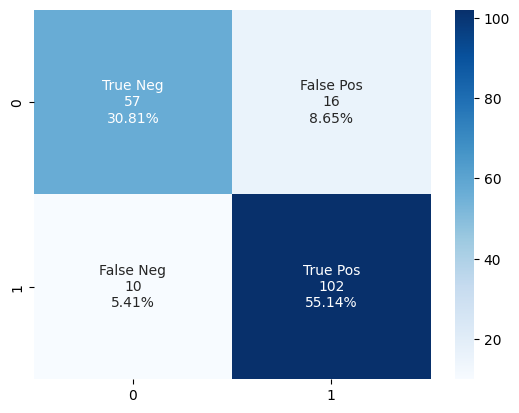

In [37]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("LogisticRegressionExample") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = classifier_lr.fit(train)

# Get predictions on test data
predictions = lr_model.transform(test)

# Convert predictions to Pandas DataFrame for confusion matrix computation
predictions_pd = predictions.select("prediction", target_column).toPandas()

# For binary classification
binary_evaluator = BinaryClassificationEvaluator(labelCol=target_column)
binary_auc = binary_evaluator.evaluate(lr_model.transform(test))

# For multiclass classification
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="accuracy")
accuracy = multiclass_evaluator.evaluate(lr_model.transform(test))

# Printing the evaluation results
print("AUC:", binary_auc)
print("Accuracy:", accuracy)

# Extracting true labels and predicted labels
y_true = predictions_pd[target_column]
y_pred = predictions_pd["prediction"]

# Compute classification report
report = classification_report(y_true, y_pred)

# Printing the classification report
print(report)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions_pd[target_column], predictions_pd["prediction"])

# Confusion matrix visualization
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.show()


ROC AUC: 0.9182974559686891


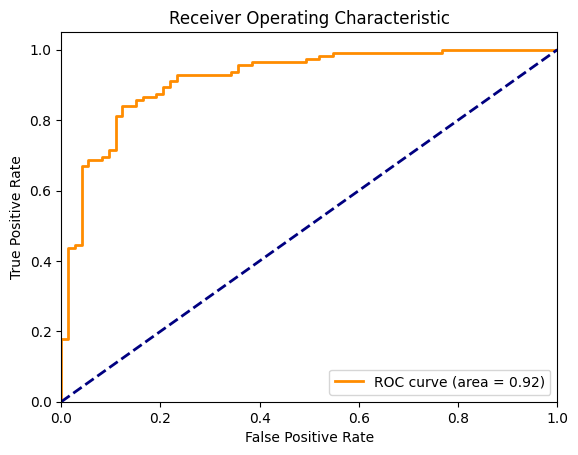

In [39]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Support Vector Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = classifier_lr.fit(train)

# Make predictions on the test data
predictions = lr_model.transform(test)

# Compute ROC AUC score
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
roc_auc = evaluator.evaluate(predictions)

print("ROC AUC:", roc_auc)

# Extract probability and label from predictions
results = predictions.select(['probability', target_column]).collect()
probabilities = np.array([x[0][1] for x in results])
labels = np.array([x[1] for x in results])

# Compute ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stop SparkSession
spark.stop()


AUC: 0.9182974559686891
Accuracy: 0.8594594594594595
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.86      0.91      0.89       112

    accuracy                           0.86       185
   macro avg       0.86      0.85      0.85       185
weighted avg       0.86      0.86      0.86       185



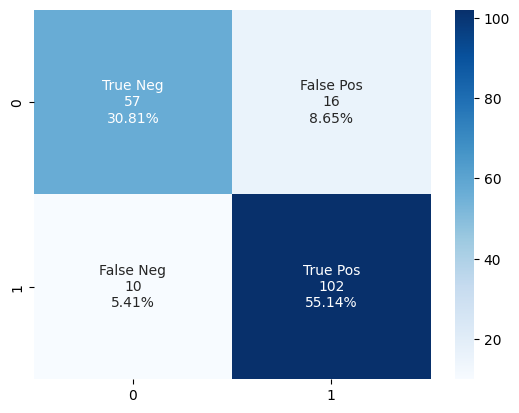

In [42]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Support Vector Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = classifier_lr.fit(train)

# Make predictions on the test data
predictions = lr_model.transform(test)

# Model Evaluation Function
def model_evaluation(predictions):
    # For binary classification
    binary_evaluator = BinaryClassificationEvaluator(labelCol=target_column)
    binary_auc = binary_evaluator.evaluate(predictions)

    # For multiclass classification
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="accuracy")
    accuracy = multiclass_evaluator.evaluate(predictions)

    # Printing the evaluation results
    print("AUC:", binary_auc)
    print("Accuracy:", accuracy)

# Perform model evaluation
model_evaluation(predictions)
# Extracting true labels and predicted labels
y_true = predictions_pd[target_column]
y_pred = predictions_pd["prediction"]

# Compute classification report
report = classification_report(y_true, y_pred)

# Printing the classification report
print(report)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions_pd[target_column], predictions_pd["prediction"])

# Confusion matrix visualization
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.show()

ROC AUC: 0.836105675146771


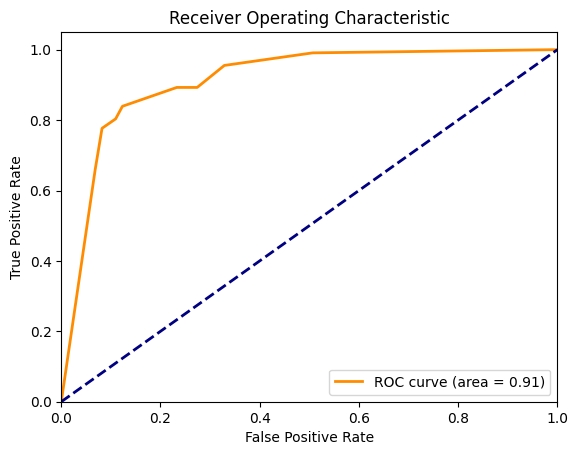

In [44]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Decision Tree Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Decision Tree Classifier model
classifier_dt = DecisionTreeClassifier(featuresCol='features', labelCol=target_column, maxDepth=4, minInstancesPerNode=1)

# Train the model
dt_model = classifier_dt.fit(train)

# Make predictions on the test data
predictions = dt_model.transform(test)

# Compute ROC AUC score
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
roc_auc = evaluator.evaluate(predictions)

print("ROC AUC:", roc_auc)

# Extract probability and label from predictions
results = predictions.select(['probability', target_column]).collect()
probabilities = np.array([x[0][1] for x in results])
labels = np.array([x[1] for x in results])

# Compute ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stop SparkSession
spark.stop()


AUC: 0.836105675146771
Accuracy: 0.8432432432432433
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.86      0.91      0.89       112

    accuracy                           0.86       185
   macro avg       0.86      0.85      0.85       185
weighted avg       0.86      0.86      0.86       185



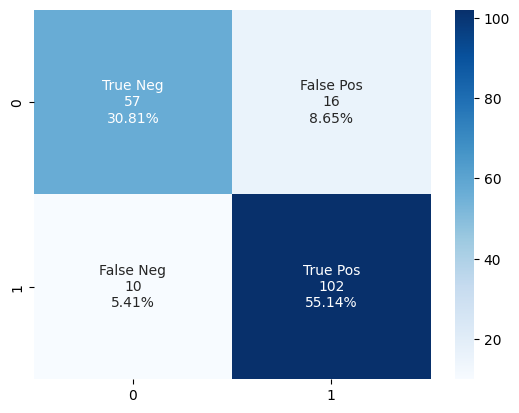

In [49]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Decision Tree Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Decision Tree Classifier model
classifier_dt = DecisionTreeClassifier(featuresCol='features', labelCol=target_column, maxDepth=4, minInstancesPerNode=1)

# Train the model
dt_model = classifier_dt.fit(train)

# Make predictions on the test data
predictions = dt_model.transform(test)

# Model Evaluation Function
def model_evaluation(predictions):
    # For binary classification
    binary_evaluator = BinaryClassificationEvaluator(labelCol=target_column)
    binary_auc = binary_evaluator.evaluate(predictions)

    # For multiclass classification
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="accuracy")
    accuracy = multiclass_evaluator.evaluate(predictions)

    # Printing the evaluation results
    print("AUC:", binary_auc)
    print("Accuracy:", accuracy)

# Perform model evaluation
model_evaluation(predictions)
# Extracting true labels and predicted labels
y_true = predictions_pd[target_column]
y_pred = predictions_pd["prediction"]

# Compute classification report
report = classification_report(y_true, y_pred)

# Printing the classification report
print(report)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions_pd[target_column], predictions_pd["prediction"])

# Confusion matrix visualization
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.show()

ROC AUC: 0.9243517612524462


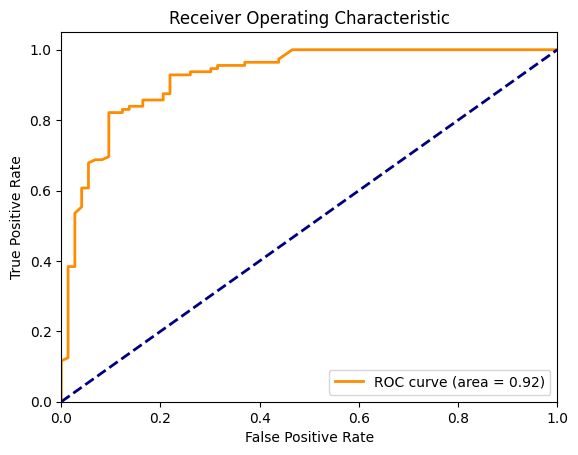

In [51]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Random Forest Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Random Forest Classifier model
classifier_rf = RandomForestClassifier(featuresCol='features', labelCol=target_column, maxDepth=4, seed=0)

# Train the model
rf_model = classifier_rf.fit(train)

# Make predictions on the test data
predictions = rf_model.transform(test)

# Compute ROC AUC score
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
roc_auc = evaluator.evaluate(predictions)

print("ROC AUC:", roc_auc)

# Extract probability and label from predictions
results = predictions.select(['probability', target_column]).collect()
probabilities = np.array([x[0][1] for x in results])
labels = np.array([x[1] for x in results])

# Compute ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stop SparkSession
spark.stop()


AUC: 0.9243517612524462
Accuracy: 0.8540540540540541
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.86      0.91      0.89       112

    accuracy                           0.86       185
   macro avg       0.86      0.85      0.85       185
weighted avg       0.86      0.86      0.86       185



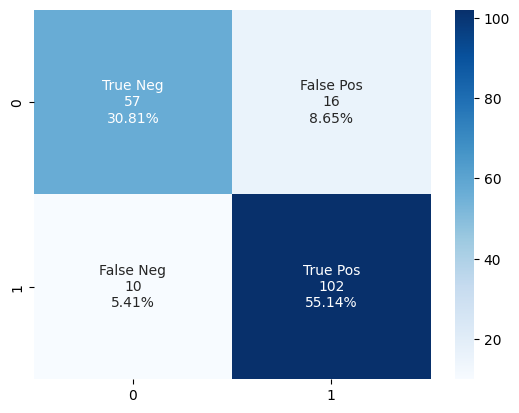

In [53]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Random Forest Classifier") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Random Forest Classifier model
classifier_rf = RandomForestClassifier(featuresCol='features', labelCol=target_column, maxDepth=4, seed=0)

# Train the model
rf_model = classifier_rf.fit(train)

# Make predictions on the test data
predictions = rf_model.transform(test)

# Model Evaluation Function
def model_evaluation(predictions):
    # For binary classification
    binary_evaluator = BinaryClassificationEvaluator(labelCol=target_column)
    binary_auc = binary_evaluator.evaluate(predictions)

    # For multiclass classification
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="accuracy")
    accuracy = multiclass_evaluator.evaluate(predictions)

    # Printing the evaluation results
    print("AUC:", binary_auc)
    print("Accuracy:", accuracy)

# Perform model evaluation
model_evaluation(predictions)
# Extracting true labels and predicted labels
y_true = predictions_pd[target_column]
y_pred = predictions_pd["prediction"]

# Compute classification report
report = classification_report(y_true, y_pred)

# Printing the classification report
print(report)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions_pd[target_column], predictions_pd["prediction"])

# Confusion matrix visualization
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.show()

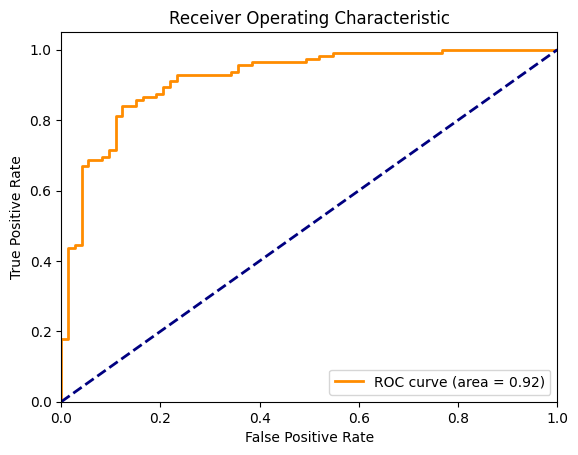

In [59]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("KNN_ROC_AUC") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = classifier_lr.fit(train)

# Make predictions on the test data
predictions = lr_model.transform(test)

# Compute probabilities
results = predictions.select(['probability', target_column]).collect()
probabilities = [x[0][1] for x in results]
labels = [x[1] for x in results]

# Compute ROC curve
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Stop SparkSession
spark.stop()

AUC: 0.9182974559686891
Accuracy: 0.8594594594594595
AUC: 0.9182974559686891
Accuracy: 0.8594594594594595
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        73
           1       0.86      0.91      0.89       112

    accuracy                           0.86       185
   macro avg       0.86      0.85      0.85       185
weighted avg       0.86      0.86      0.86       185



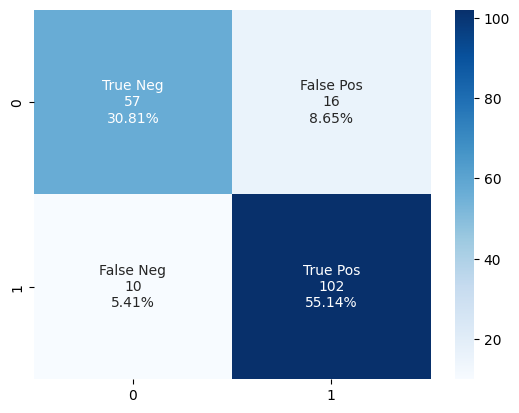

In [61]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("KNN_ROC_AUC") \
    .getOrCreate()

# Assuming you have a DataFrame named 'df1' with features and label columns
df1 = spark.read.csv("heart.csv", header=True, inferSchema=True)

# Define categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
numerical_cols = [col for col in df1.columns if col not in ['HeartDisease', 'RestingBP', 'RestingECG'] + categorical_cols]
target_column = 'HeartDisease'

# Convert categorical columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
indexed_df1 = df1
for indexer in indexers:
    indexed_df1 = indexer.fit(indexed_df1).transform(indexed_df1)

# Assemble feature vectors
assembler_inputs = [col+"_index" for col in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
data = assembler.transform(indexed_df1).select("features", target_column)

# Split the data into training and test sets
train, test = data.randomSplit([0.8, 0.2], seed=2)

# Initialize Logistic Regression model
classifier_lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = classifier_lr.fit(train)

# Make predictions on the test data
predictions = lr_model.transform(test)

# Evaluate the model
binary_evaluator = BinaryClassificationEvaluator(labelCol=target_column)
binary_auc = binary_evaluator.evaluate(predictions)

multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="accuracy")
accuracy = multiclass_evaluator.evaluate(predictions)

print("AUC:", binary_auc)
print("Accuracy:", accuracy)
# Perform model evaluation
model_evaluation(predictions)
# Extracting true labels and predicted labels
y_true = predictions_pd[target_column]
y_pred = predictions_pd["prediction"]

# Compute classification report
report = classification_report(y_true, y_pred)

# Printing the classification report
print(report)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions_pd[target_column], predictions_pd["prediction"])

# Confusion matrix visualization
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
plt.show()
# Stop SparkSession
spark.stop()


# New Section